<a href="https://colab.research.google.com/github/nervaljunior/JupyterHub/blob/main/Analise_Temporal_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="width: 100%; overflow: hidden;">
        <h1>Time Series Analysis</h1>
        <h1>ARIMA Models</h1>
        <p>Nerval Junior<br/>
        <a href="https://github.com/nervaljunior">github</a><br/>
        @nervalzin_d</p></div>
</div>

# Analise de serie temporal com ARIMA


In [2]:
from google.colab import files
uploaded = files.upload()

Saving wind_merged.xlsx to wind_merged.xlsx


In [35]:
# Import libraries
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from pandas import datetime
from math import sqrt

# Defaults
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

#for Analisys ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
!pip install deap
from deap import base, creator, tools, algorithms

import scipy
from scipy import stats

!pip install watermark

import watermark

%load_ext watermark
%matplotlib inline

<ipython-input-35-5f8834ee144a>:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [36]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.58+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

Git hash: 

watermark  : 2.4.3
deap       : 1.4.1
statsmodels: 0.14.1
google     : 2.0.3
numpy      : 1.23.5
pandas     : 1.5.3
matplotlib : 3.7.1
scipy      : 1.11.4



In [37]:
df = pd.read_excel('/content/wind_merged.xlsx',header=0, index_col=0, parse_dates=True, squeeze=True)
df.head()

<ipython-input-37-476606ad47cf>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_excel('/content/wind_merged.xlsx',header=0, index_col=0, parse_dates=True, squeeze=True)


,Int Temp (°C),Ext Temp (°C),Pressure (hPa),Rel Humidity (%),Wiper count,Vbatt (V),40m Wind Speed (m/s),40m Wind Speed Dispersion (m/s),40m Wind Speed min (m/s),40m Wind Speed max (m/s),...,260m Wind Speed Dispersion (m/s),260m Wind Speed min (m/s),260m Wind Speed max (m/s),260m Wind Direction (°),260m Z-wind (m/s),260m Z-wind Dispersion (m/s),260m CNR (dB),260m CNR min (dB),260m Dopp Spect Broad (m/s),260m Data Availability (%)
Timestamp (end of interval),,,,,,,,,,,,,,,,,,,,,
2023-02-26 11:50:00,37.4,999,999,999,0,NaN,5.04,1.21,2.11,7.89,...,1.23,2.87,9.36,325.56,0.20,0.66,-19.48,-21.80,0.08,100.00
2023-02-26 12:00:00,37.7,999,999,999,0,NaN,5.61,1.15,2.79,9.87,...,1.26,1.86,10.72,324.24,0.36,0.81,-20.08,-22.93,0.09,98.67
2023-02-26 12:10:00,38.2,999,999,999,0,NaN,4.96,1.44,1.10,7.98,...,1.54,1.22,10.01,339.82,-0.60,1.60,-20.22,-22.87,0.16,99.33
2023-02-26 12:20:00,38.8,999,999,999,0,NaN,5.30,1.23,1.50,9.55,...,1.64,1.09,8.80,323.29,0.43,1.09,-20.14,-21.87,0.11,100.00
2023-02-26 12:30:00,39.0,999,999,999,0,NaN,3.94,1.23,0.54,7.52,...,1.18,2.20,9.21,314.48,-0.06,0.91,-20.16,-22.60,0.12,100.00


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 330 entries, 2023-02-26 11:50:00 to 2023-02-28 19:30:00
Columns: 245 entries, Int Temp (°C) to 260m Data Availability (%)
dtypes: float64(241), int64(4)
memory usage: 634.2 KB


Equation for AR model : <br>
![alt text](https://i.stack.imgur.com/cj6yX.png)

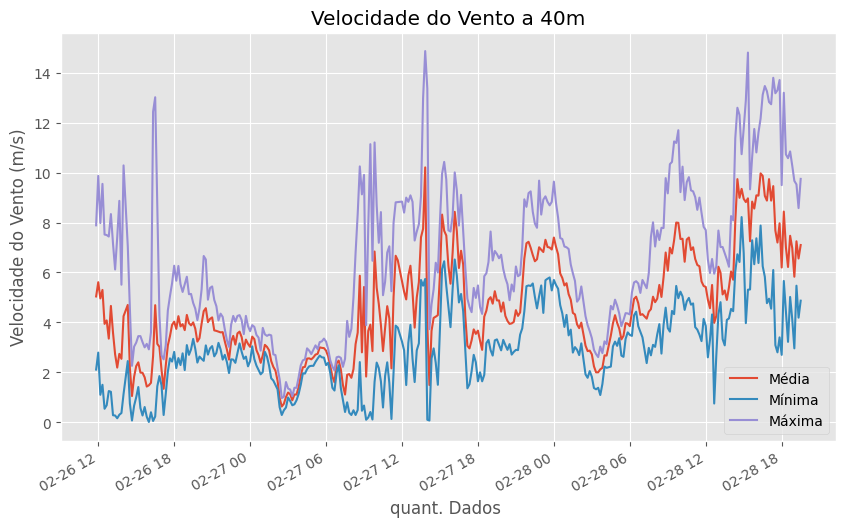

In [7]:
dados_velocidade = df[['40m Wind Speed (m/s)', '40m Wind Speed min (m/s)', '40m Wind Speed max (m/s)']]

# Plotar os dados
dados_velocidade.plot(figsize=(10, 6))  # Tamanho opcional do gráfico
plt.title('Velocidade do Vento a 40m')
plt.xlabel('quant. Dados ')
plt.ylabel('Velocidade do Vento (m/s)')
plt.grid(True)
plt.legend(['Média', 'Mínima', 'Máxima'])
plt.show()

In [39]:
velocidade_media = df[['40m Wind Speed (m/s)']]
sales = velocidade_media
sales.head()

,40m Wind Speed (m/s)
Timestamp (end of interval),
2023-02-26 11:50:00,5.04
2023-02-26 12:00:00,5.61
2023-02-26 12:10:00,4.96
2023-02-26 12:20:00,5.30
2023-02-26 12:30:00,3.94


<Axes: xlabel='Timestamp (end of interval)'>

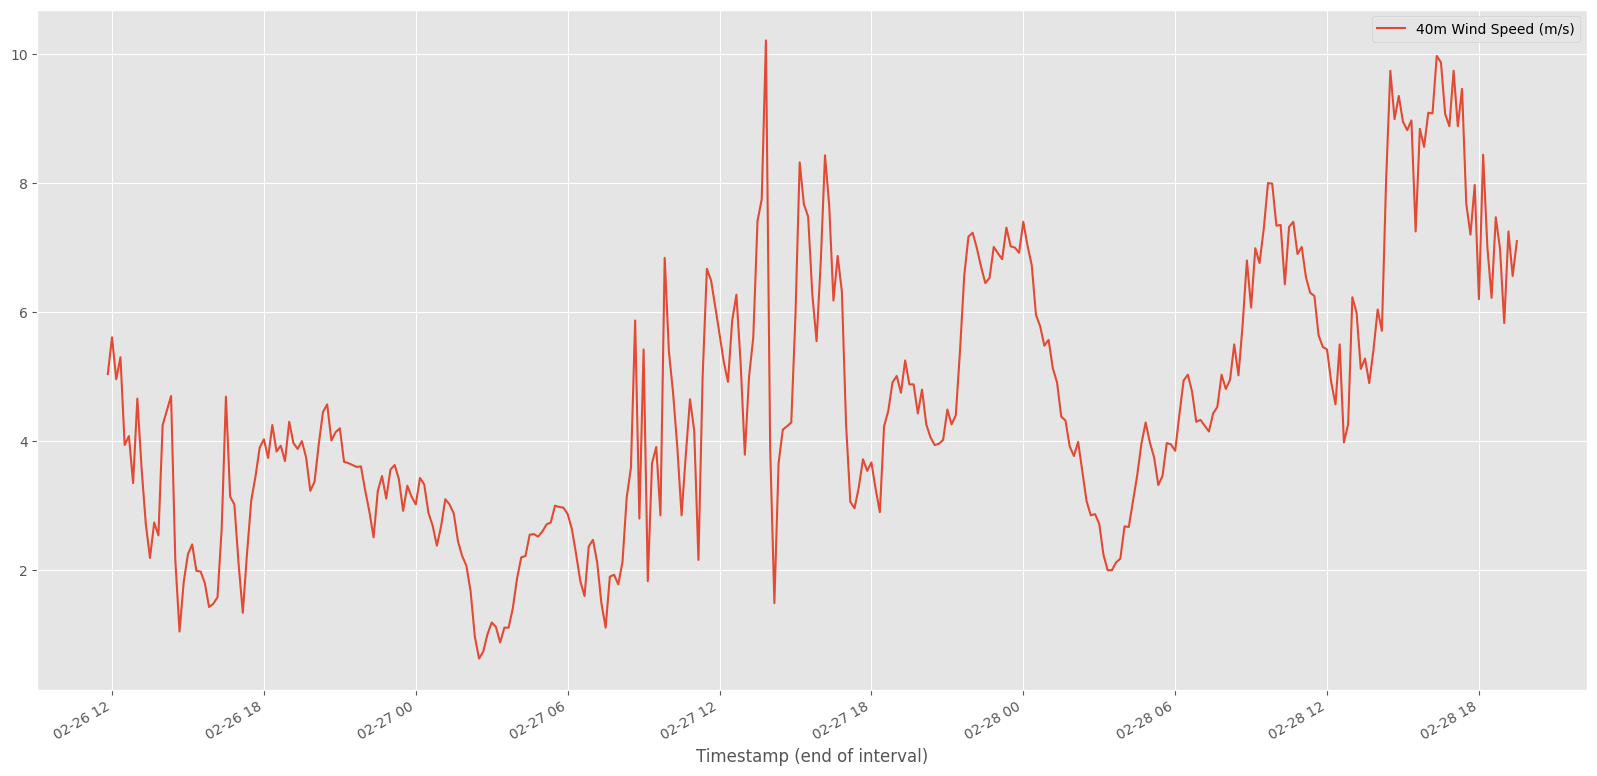

In [40]:
sales.plot()

A função simplesmente multiplica os coeficientes $\theta$ com os valores em execução das variáveis estocásticas $\epsilon$. Geramos alguns exemplos de processos MA.

# Passos do Modelo ARIMA:

1. Tornar os dados estacionários por diferenciação. (I)
2. Ajustar um modelo AR. (AR)
3. Ajustar um modelo MA nos resíduos. (MA)
4. Obter os dados originais de volta.

In [10]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Teste Aumentado de Dickey-Fuller:')
    labels = ['Estatística do Teste ADF', 'Valor-p', 'Número de Defasagens Utilizadas', 'Número de Observações Utilizadas']

    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))

    if result[1] <= 0.05:
        print("forte evidência contra a hipótese nula, rejeita-se a hipótese nula. Os dados não têm raiz unitária e são estacionários")
    else:
        print("evidência fraca contra a hipótese nula, a série temporal possui uma raiz unitária, indicando que é não estacionária \n")


# Passo 1: Tornando os dados estacionários

Diferentes técnicas podem ser usadas para tornar os dados estacionários, como o uso de logaritmo e diferenciação. A diferenciação adicional diff(12) é usada para remover a sazonalidade.

In [12]:
df_testing = pd.DataFrame(np.log(sales).diff().diff(12))
adf_check(df_testing.dropna())

#outra forma de fazer esses resultados so que de forma menos robusta e precisa
result = adfuller(sales.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

Teste Aumentado de Dickey-Fuller:
Estatística do Teste ADF : -7.808449104669299
Valor-p : 7.176123441129619e-12
Número de Defasagens Utilizadas : 13
Número de Observações Utilizadas : 303
forte evidência contra a hipótese nula, rejeita-se a hipótese nula. Os dados não têm raiz unitária e são estacionários
ADF Statistic: -2.281848
p-value: 0.177889


<Axes: xlabel='Timestamp (end of interval)'>

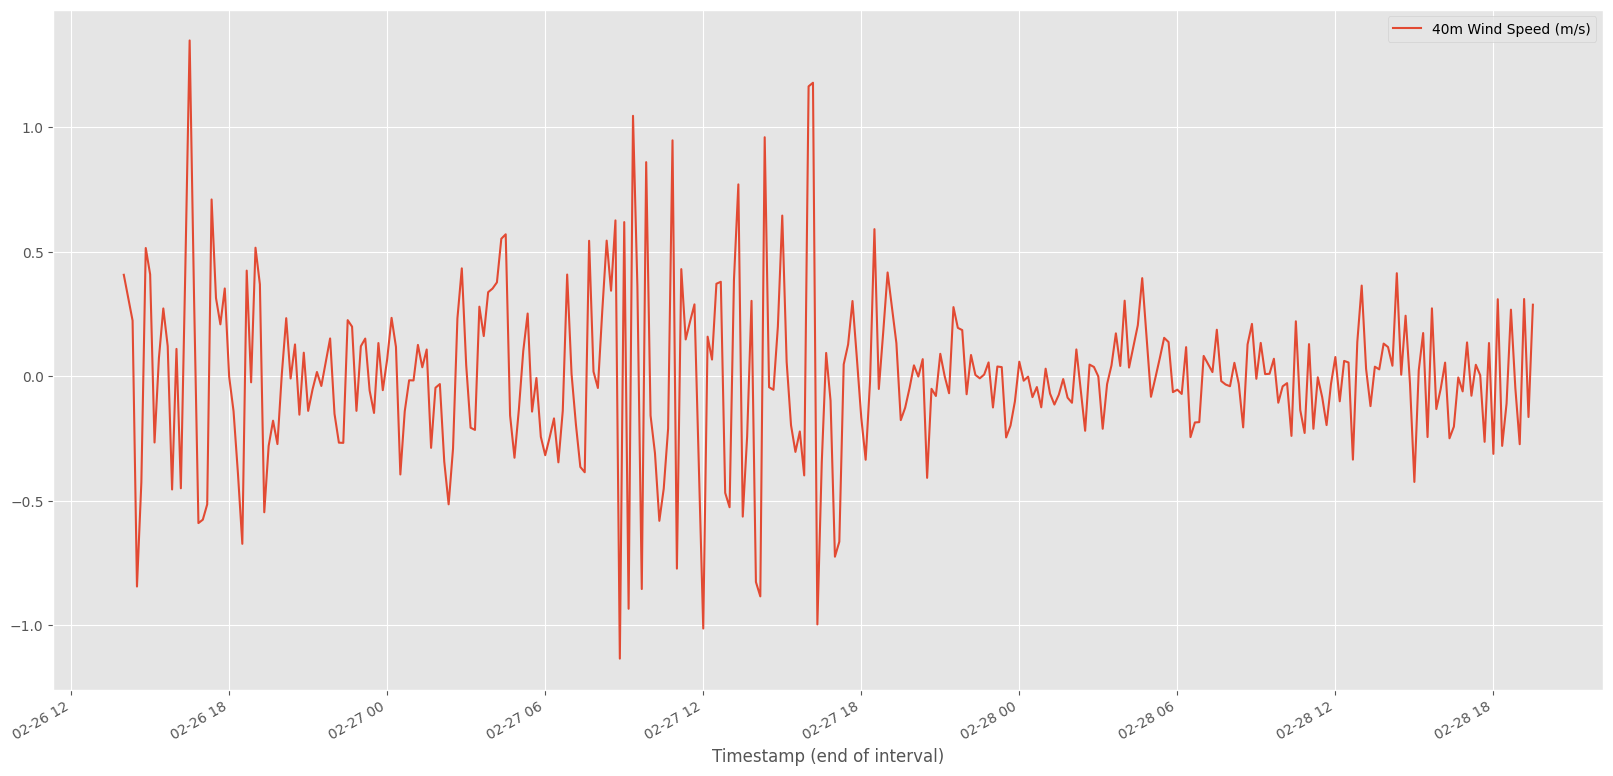

In [13]:
# print(df_testing.to_string())
df_testing.plot()

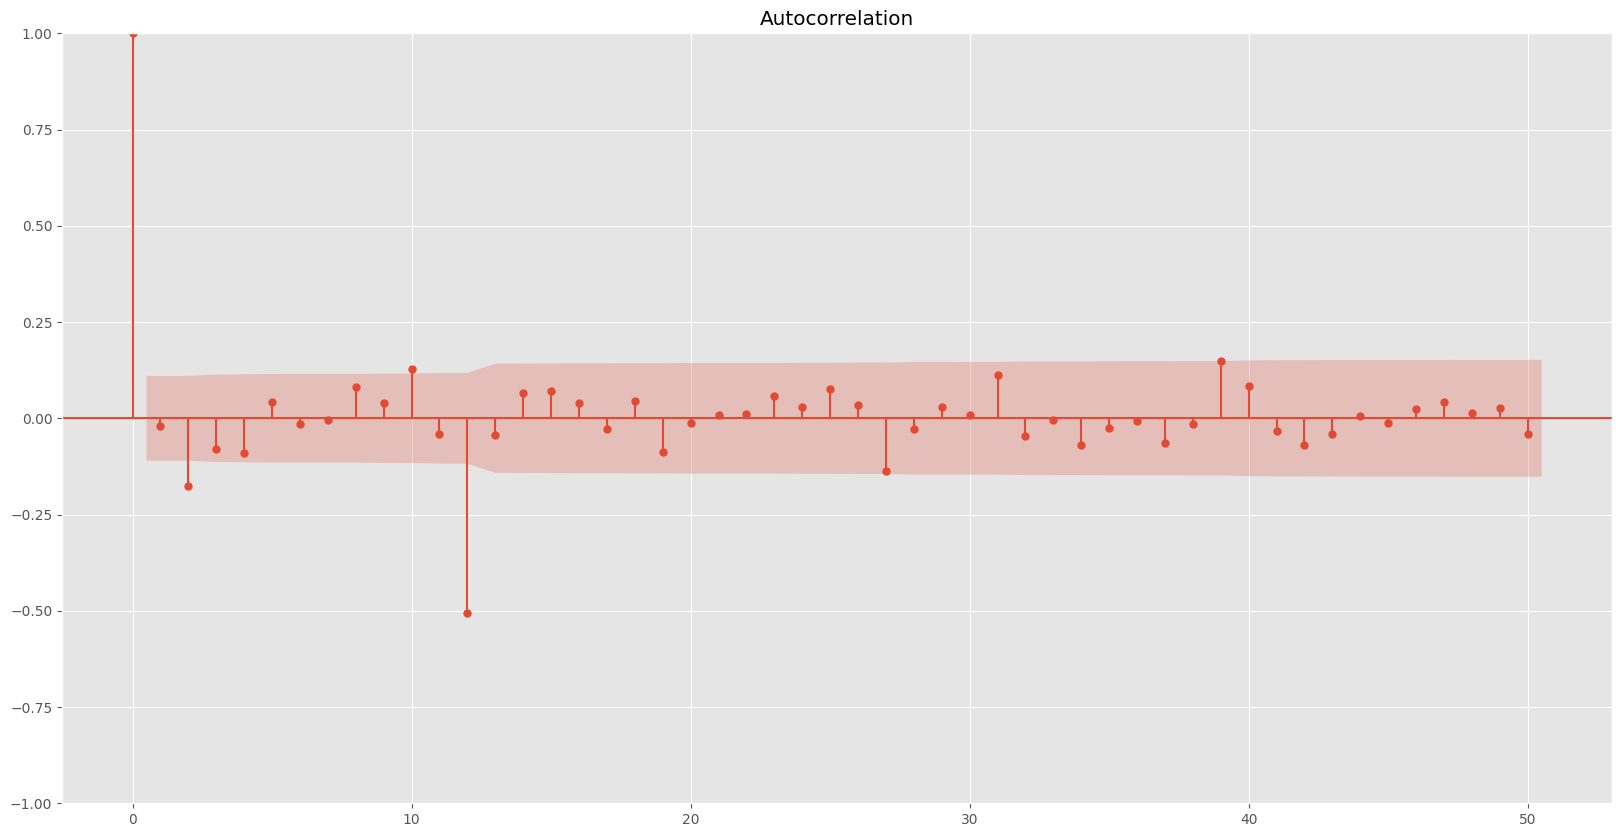

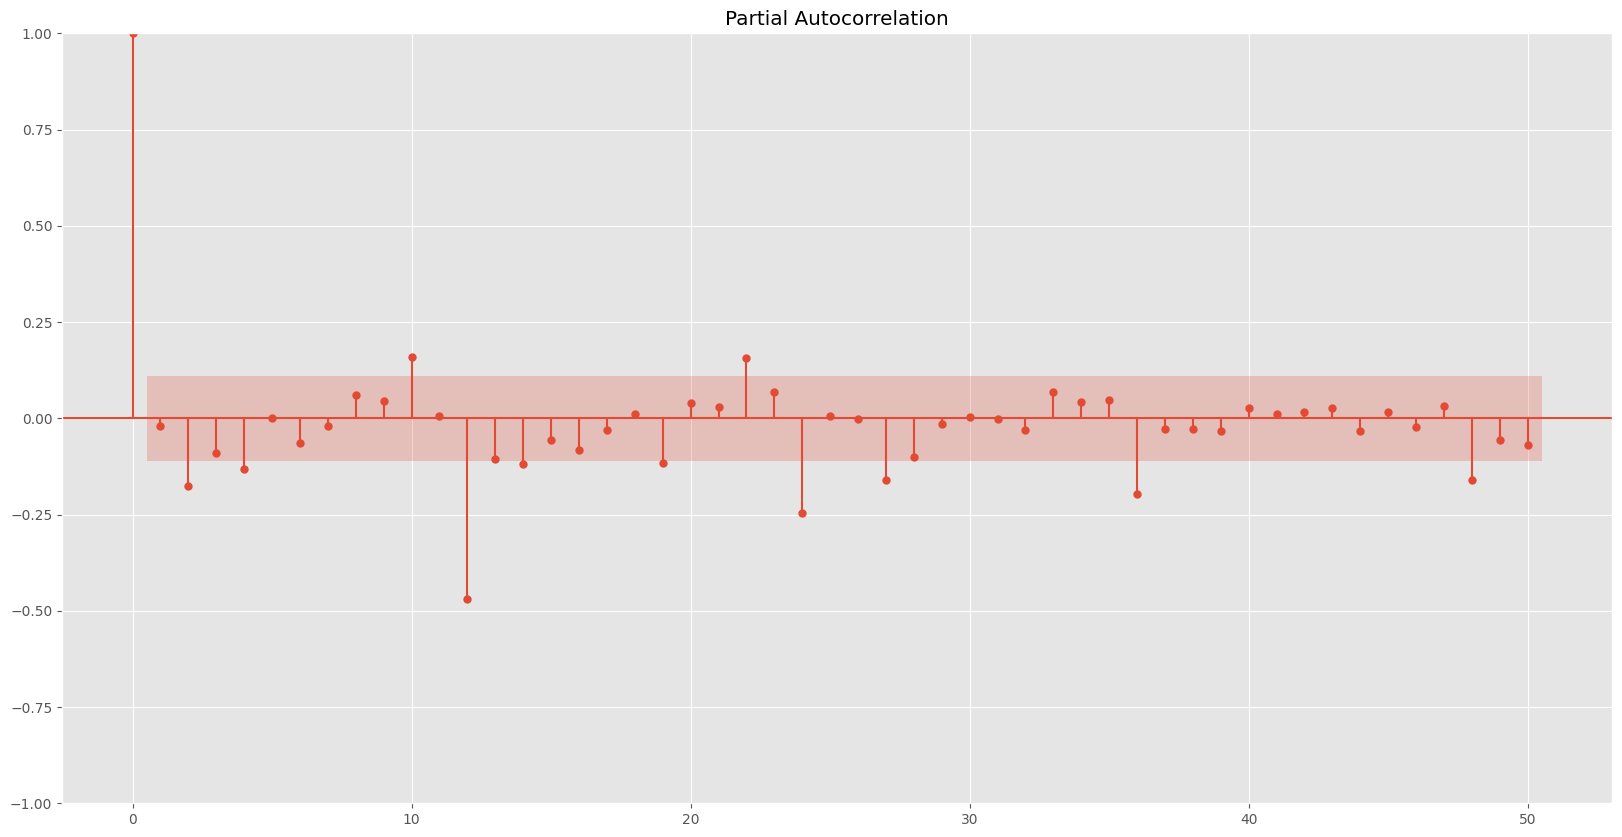

In [14]:
ACF = plot_acf(df_testing.dropna(),lags=50)
PACF = plot_pacf(df_testing.dropna(),lags=50)

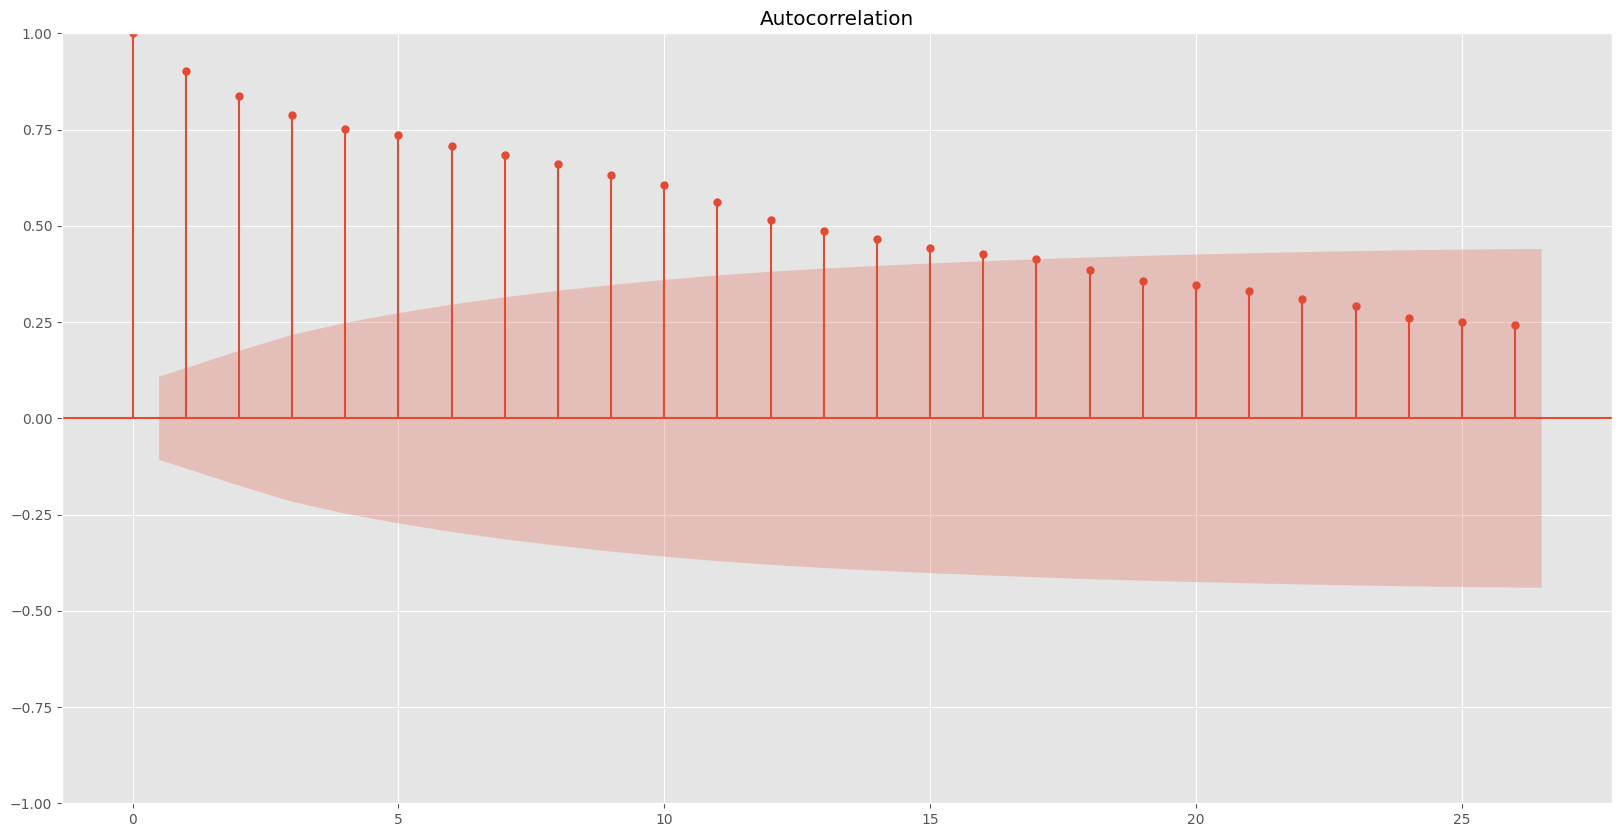

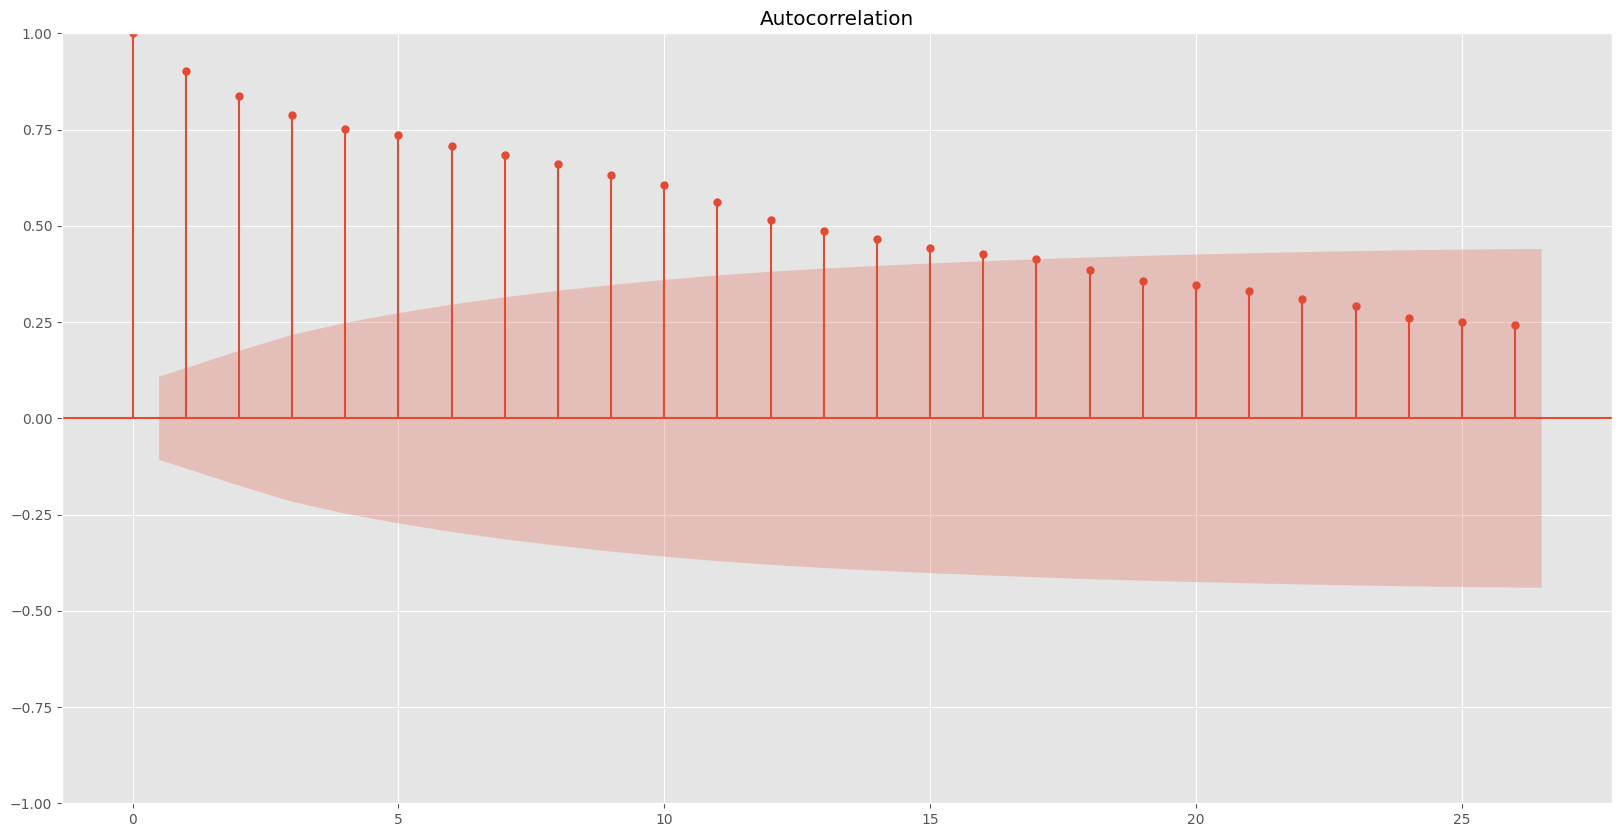

In [15]:
plot_acf(sales)

In [16]:
sales.head()

,40m Wind Speed (m/s)
Timestamp (end of interval),
2023-02-26 11:50:00,5.04
2023-02-26 12:00:00,5.61
2023-02-26 12:10:00,4.96
2023-02-26 12:20:00,5.30
2023-02-26 12:30:00,3.94


In [17]:
sales.shift(1)

,40m Wind Speed (m/s)
Timestamp (end of interval),
2023-02-26 11:50:00,NaN
2023-02-26 12:00:00,5.04
2023-02-26 12:10:00,5.61
2023-02-26 12:20:00,4.96
2023-02-26 12:30:00,5.30
...,...
2023-02-28 18:50:00,7.47
2023-02-28 19:00:00,6.98
2023-02-28 19:10:00,5.83


In [18]:
sales_diff = sales.diff(periods=1)

In [19]:
sales_diff = sales_diff[1:]
sales_diff.head()

,40m Wind Speed (m/s)
Timestamp (end of interval),
2023-02-26 12:00:00,0.57
2023-02-26 12:10:00,-0.65
2023-02-26 12:20:00,0.34
2023-02-26 12:30:00,-1.36
2023-02-26 12:40:00,0.14


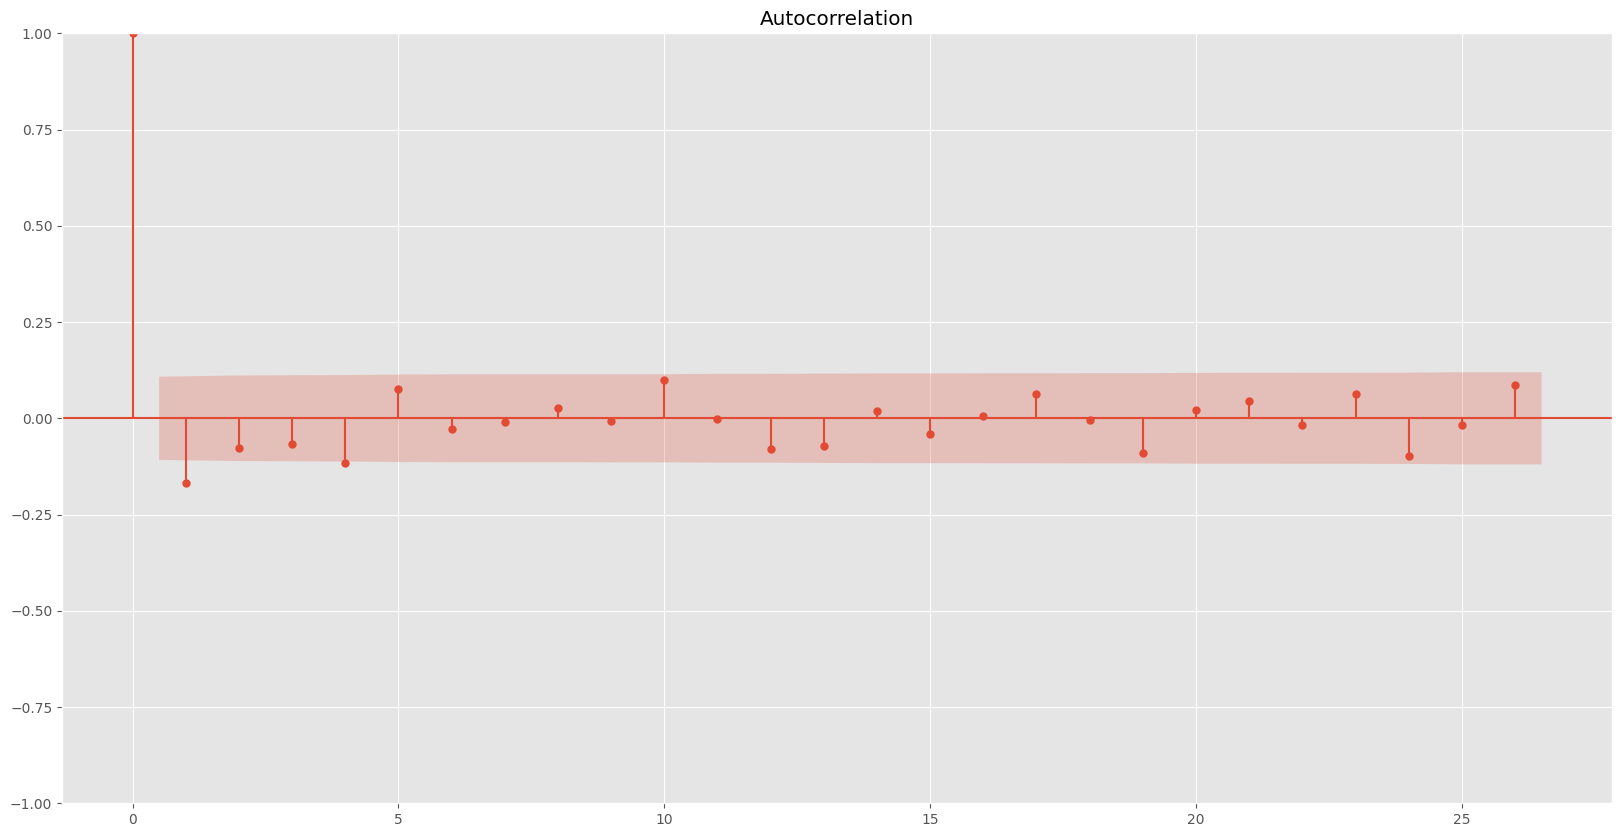

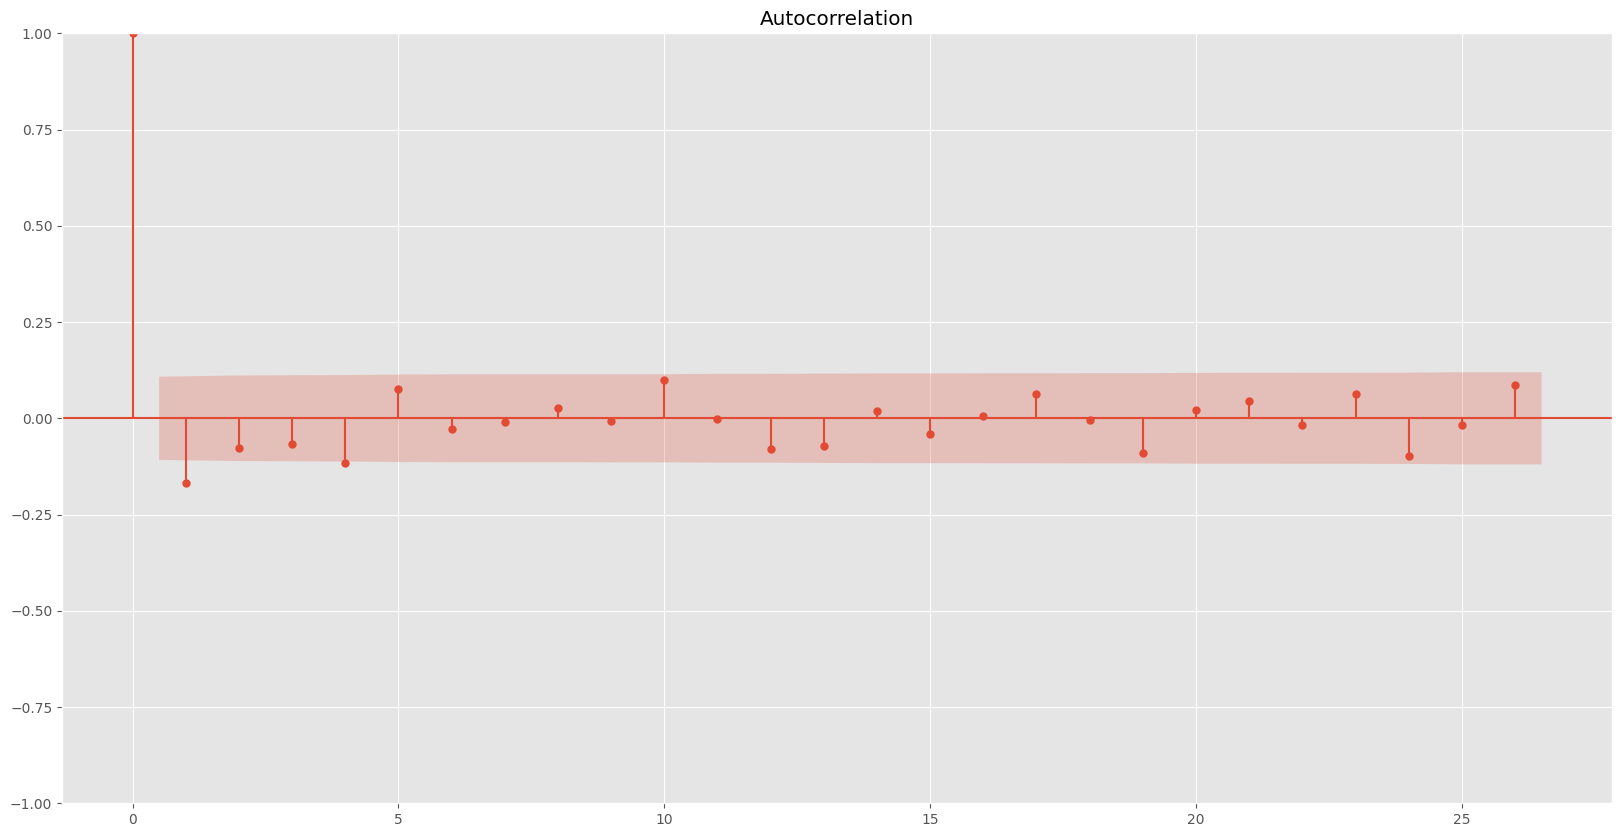

In [20]:
plot_acf(sales_diff)

<Axes: xlabel='Timestamp (end of interval)'>

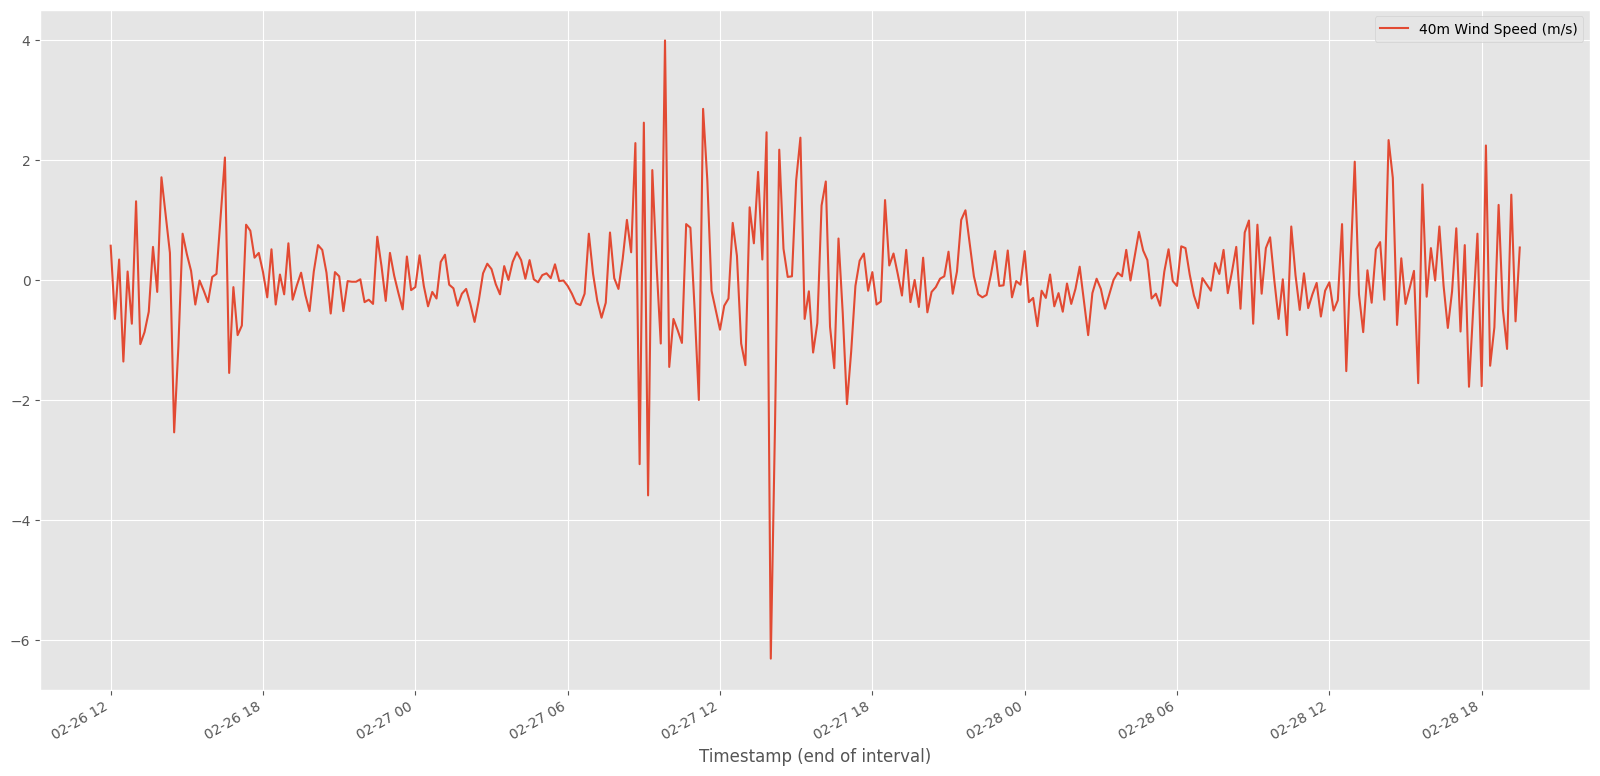

In [21]:
sales_diff.plot()

In [22]:
X = sales.values
train = X[0:90] # 99 data as train data
test = X[90:]  # rest of data as test data
predictions = []

In [23]:
test

array([[ 1.19],
       [ 1.12],
       [ 0.88],
       [ 1.11],
       [ 1.11],
       [ 1.41],
       [ 1.87],
       [ 2.2 ],
       [ 2.22],
       [ 2.55],
       [ 2.56],
       [ 2.52],
       [ 2.6 ],
       [ 2.71],
       [ 2.74],
       [ 3.  ],
       [ 2.98],
       [ 2.97],
       [ 2.87],
       [ 2.64],
       [ 2.25],
       [ 1.83],
       [ 1.6 ],
       [ 2.37],
       [ 2.47],
       [ 2.12],
       [ 1.49],
       [ 1.11],
       [ 1.9 ],
       [ 1.93],
       [ 1.78],
       [ 2.13],
       [ 3.13],
       [ 3.59],
       [ 5.87],
       [ 2.8 ],
       [ 5.42],
       [ 1.83],
       [ 3.66],
       [ 3.91],
       [ 2.85],
       [ 6.84],
       [ 5.39],
       [ 4.74],
       [ 3.9 ],
       [ 2.85],
       [ 3.78],
       [ 4.65],
       [ 4.16],
       [ 2.16],
       [ 5.01],
       [ 6.67],
       [ 6.49],
       [ 5.66],
       [ 5.23],
       [ 4.92],
       [ 5.87],
       [ 6.27],
       [ 5.21],
       [ 3.79],
       [ 5.  ],
       [ 5.61],
       [

# Autoreggresive AR Model

In [24]:
from statsmodels.tsa.ar_model import AutoReg

model_ar = AutoReg(train, lags=5)
model_ar_fit = model_ar.fit()

In [25]:
predictions = model_ar_fit.predict(start=89,end=118)
print(predictions)

[1.22992663 1.366737   1.52843291 1.56888468 1.59550877 1.66301518
 1.76936892 1.87256208 1.94976651 2.00437286 2.05105557 2.09981337
 2.15038652 2.19788935 2.23910916 2.27445876 2.30617116 2.33589311
 2.36389069 2.38969276 2.41298269 2.43392654 2.4529523  2.47041924
 2.48648891 2.50120215 2.51460384 2.52679582 2.5379121  2.54807375]


In [26]:
test

array([[ 1.19],
       [ 1.12],
       [ 0.88],
       [ 1.11],
       [ 1.11],
       [ 1.41],
       [ 1.87],
       [ 2.2 ],
       [ 2.22],
       [ 2.55],
       [ 2.56],
       [ 2.52],
       [ 2.6 ],
       [ 2.71],
       [ 2.74],
       [ 3.  ],
       [ 2.98],
       [ 2.97],
       [ 2.87],
       [ 2.64],
       [ 2.25],
       [ 1.83],
       [ 1.6 ],
       [ 2.37],
       [ 2.47],
       [ 2.12],
       [ 1.49],
       [ 1.11],
       [ 1.9 ],
       [ 1.93],
       [ 1.78],
       [ 2.13],
       [ 3.13],
       [ 3.59],
       [ 5.87],
       [ 2.8 ],
       [ 5.42],
       [ 1.83],
       [ 3.66],
       [ 3.91],
       [ 2.85],
       [ 6.84],
       [ 5.39],
       [ 4.74],
       [ 3.9 ],
       [ 2.85],
       [ 3.78],
       [ 4.65],
       [ 4.16],
       [ 2.16],
       [ 5.01],
       [ 6.67],
       [ 6.49],
       [ 5.66],
       [ 5.23],
       [ 4.92],
       [ 5.87],
       [ 6.27],
       [ 5.21],
       [ 3.79],
       [ 5.  ],
       [ 5.61],
       [

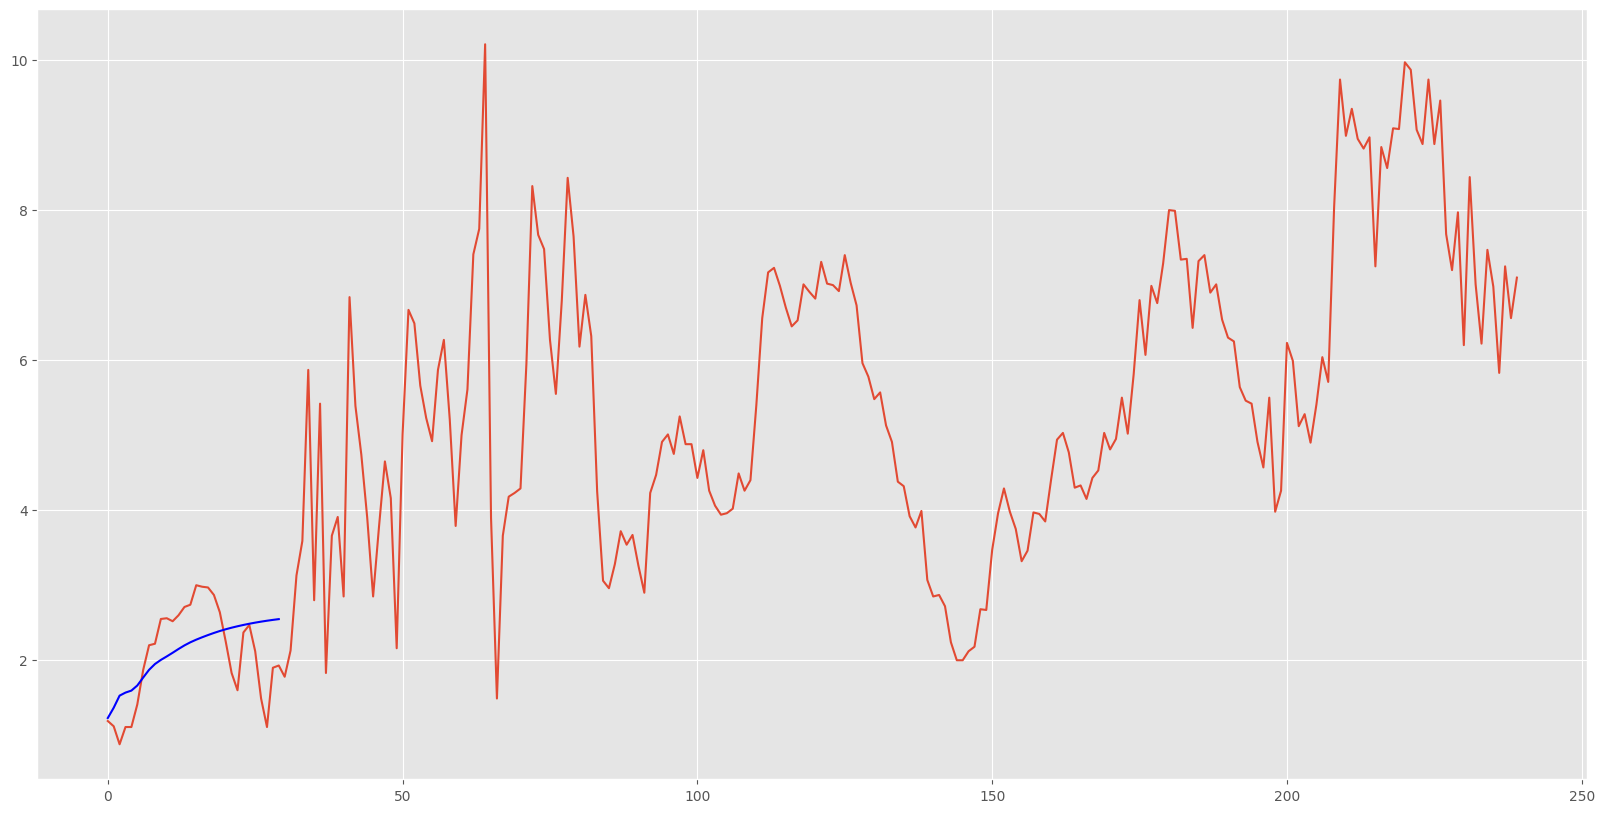

In [28]:
plt.plot(test)
plt.plot(predictions,color='blue')
#ESSE PLOT TA INCORRETO

# ARIMA model

ARIMA significa Auto-Regressive Integrated Moving Average. Existem três inteiros (p, d, q) que são usados para parametrizar os modelos ARIMA. Por causa disso, um modelo ARIMA não sazonal é denotado como ARIMA(p, d, q):
<ul>
<li><strong>p</strong> é o número de termos autorregressivos (parte AR). Isso permite incorporar o efeito de valores passados em nosso modelo. Intuitivamente, isso seria semelhante a afirmar que é provável que faça calor amanhã se estiver fazendo calor nos últimos 3 dias.</li>
<li><strong>d</strong> é o número de diferenças não sazonais necessárias para estacionariedade. Intuitivamente, isso seria semelhante a afirmar que é provável que faça a mesma temperatura amanhã se a diferença de temperatura nos últimos três dias tiver sido muito pequena.</li>
<li><strong>q</strong> é o número de erros de previsão atrasados na equação de previsão (parte MA). Isso nos permite definir o erro de nosso modelo como uma combinação linear dos valores de erro observados em pontos de tempo anteriores no passado.</li>
</ul>

Ao lidar com efeitos sazonais, como em nosso exemplo, é usado o ARIMA sazonal, que é denotado como ARIMA(p, d, q)(P, D, Q)s. Aqui, (p, d, q) são os parâmetros não sazonais descritos acima, (<strong>P, D, Q</strong>) seguem a mesma definição, mas são aplicados ao componente sazonal da série temporal. O termo <strong>s</strong> é a periodicidade da série temporal.

In [29]:
model_arima = ARIMA(train,order=(6, 1, 4))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


176.46849928033316


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
predictions1= model_arima_fit.forecast(steps=38)[0]
predictions1

1.0103769925145212

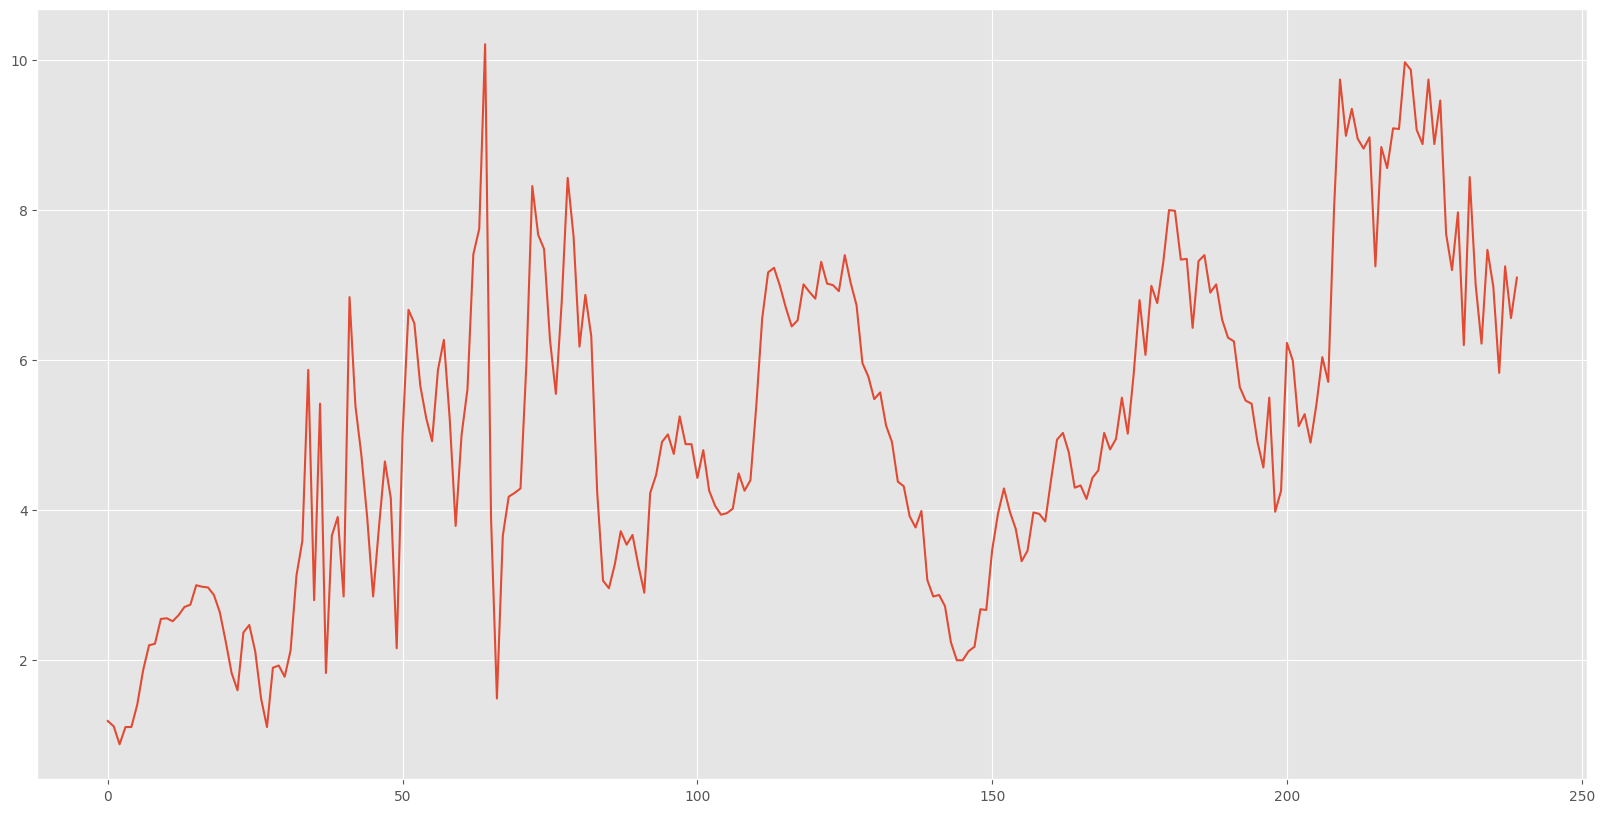

In [31]:
plt.plot(test)
plt.plot(predictions1,color='blue')

In [32]:
import itertools
p=d=q=range(0,8)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1,

In [33]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)

    except:
        continue

(0, 0, 0) 269.6830314449967
(0, 0, 1) 213.58525677261827
(0, 0, 2) 190.77968572601083
(0, 0, 3) 187.0483687131278
(0, 0, 4) 181.92268841417885
(0, 0, 5) 183.47224637400942
(0, 0, 6) 182.39562942485867
(0, 0, 7) 184.17977149615663
(0, 1, 0) 176.05174587568246
(0, 1, 1) 178.04837716724734
(0, 1, 2) 175.49229214768056
(0, 1, 3) 173.3167624973503
(0, 1, 4) 175.27421198598552
(0, 1, 5) 177.27331016470183
(0, 1, 6) 170.33936993957673
(0, 1, 7) 172.06232516166867
(0, 2, 0) 236.05396649489975
(0, 2, 1) 181.14205538552307
(0, 2, 2) 183.1420828756243
(0, 2, 3) 180.19131987516465
(0, 2, 4) 172.21722813095244
(0, 2, 5) 174.0630365140041
(0, 2, 6) 175.7078788280151
(0, 2, 7) 172.42926217226596
(0, 3, 0) 324.0958333614238
(0, 3, 1) 240.8662618723015
(0, 3, 2) 191.2912731247341
(0, 3, 3) 195.88492562280982
(0, 3, 4) 190.30225390880625
(0, 3, 5) 182.1768444824674
(0, 3, 6) 183.96184684693665
(0, 3, 7) 185.43320629434976
(0, 4, 0) 421.8991361404845
(0, 4, 1) 327.85010576394296
(0, 4, 2) 249.74017557932

Exemplos de combinações de parâmetros para SARIMA sazonal...
SARIMA sazonal: (0, 0, 1) x (0, 0, 1, 12)
SARIMA sazonal: (0, 0, 1) x (0, 1, 0, 12)
SARIMA sazonal: (0, 1, 0) x (0, 1, 1, 12)
SARIMA sazonal: (0, 1, 0) x (1, 0, 0, 12)
O menor AIC é 763.6222720036775 para o modelo SARIMA(3, 1, 1)x(3, 0, 0, 12)


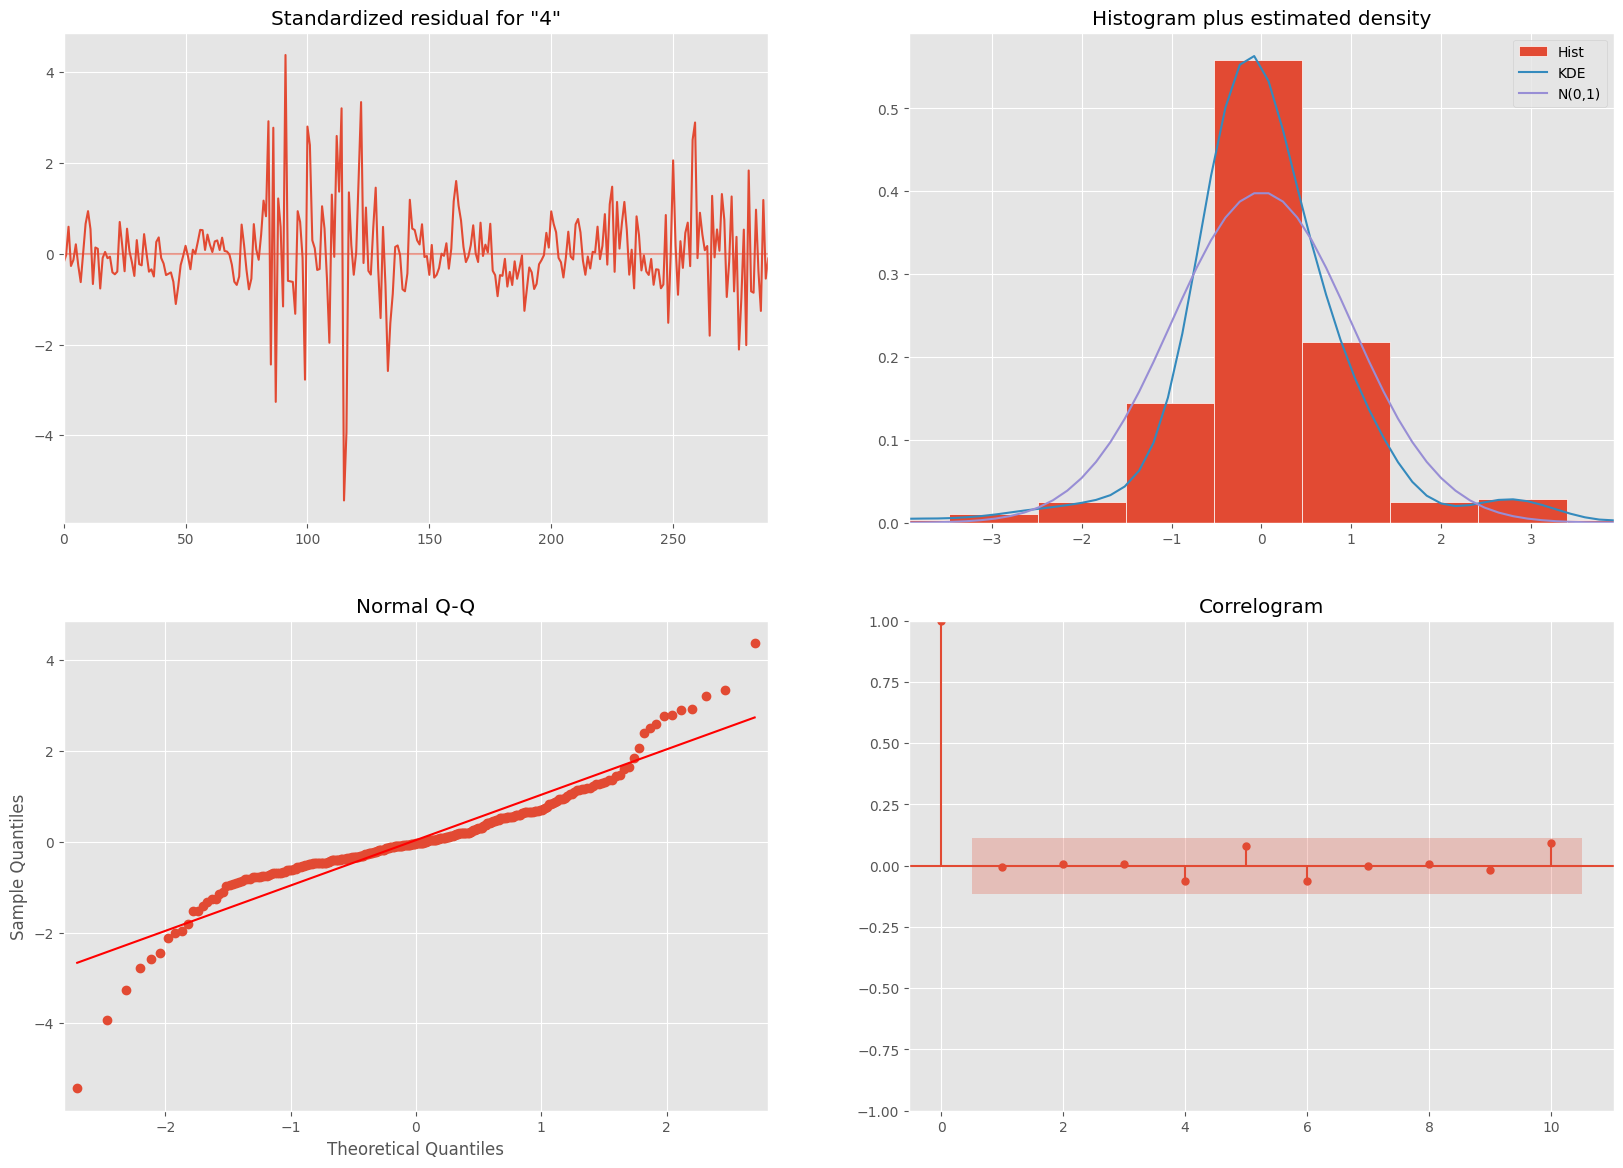

In [34]:
# Define os parâmetros d e q para assumir qualquer valor entre 0 e 1
q = d = range(0, 2)
# Define os parâmetros p para assumir qualquer valor entre 0 e 3
p = range(0, 4)

# Gera todas as diferentes combinações de triplos p, q e q
pdq = list(itertools.product(p, d, q))

# Gera todas as diferentes combinações sazonais de triplos p, q e q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Exemplos de combinações de parâmetros para SARIMA sazonal...')
print('SARIMA sazonal: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMA sazonal: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMA sazonal: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMA sazonal: {} x {}'.format(pdq[2], seasonal_pdq[4]))

# Seleciona os dados de treinamento e teste corretamente
train_data = sales['2023-02-26 11:50:00':'2023-02-28 19:30:00']
test_data = sales['2023-02-26 11:50:00':'2023-02-28 19:30:00']

warnings.filterwarnings("ignore") # especifica para ignorar mensagens de aviso

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

print('O menor AIC é {} para o modelo SARIMA{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

# Vamos ajustar este modelo
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

results.plot_diagnostics(figsize=(20, 14))
plt.show()


330    6.932319
331    6.889982
332    7.020030
333    6.758769
334    6.700542
         ...   
655    7.138839
656    7.138839
657    7.138839
658    7.138839
659    7.138839
Name: predicted_mean, Length: 330, dtype: float64


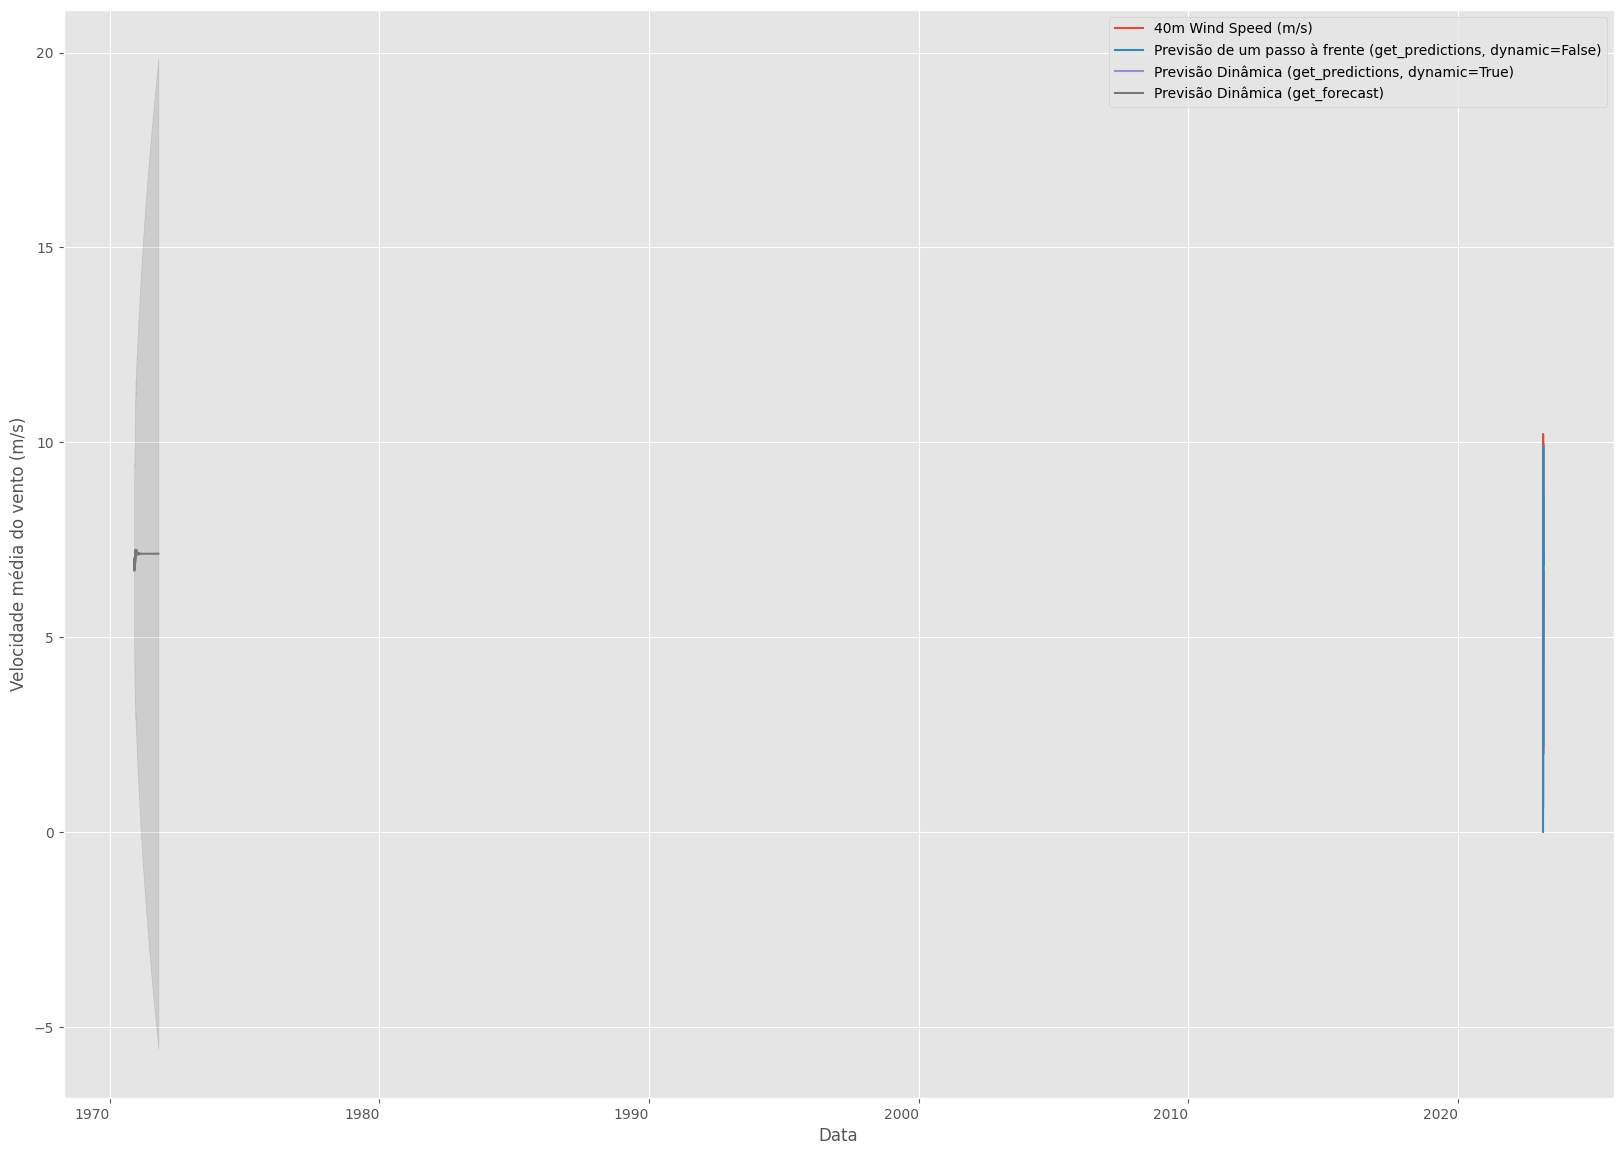

O Erro Médio Percentual Absoluto para a previsão de 1960 é 108.27%


In [35]:
## Resultados

# Defina o índice de data/hora
train_data.index = pd.to_datetime(train_data.index)
test_data.index = pd.to_datetime(test_data.index)

# Calcule o número de observações no conjunto de treinamento
nobs_train = len(train_data)
nobs_test = len(test_data)

# Obtenha a previsão
pred0 = results.get_prediction(start=train_data.index[0], dynamic=False)
pred0_ci = pred0.conf_int()

pred1 = results.get_prediction(start=train_data.index[0], dynamic=True)
pred1_ci = pred1.conf_int()

pred2 = results.get_forecast(steps=nobs_test)
pred2_ci = pred2.conf_int()
print(pred2.predicted_mean)

# Plotagem da previsão

ax = train_data.plot(figsize=(20, 16))
pred0.predicted_mean.plot(ax=ax, label='Previsão de um passo à frente (get_predictions, dynamic=False)')
pred1.predicted_mean.plot(ax=ax, label='Previsão Dinâmica (get_predictions, dynamic=True)')
pred2.predicted_mean.plot(ax=ax, label='Previsão Dinâmica (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Velocidade média do vento (m/s)')
plt.xlabel('Data')
plt.legend()
plt.show()


# Conclusão
previsao = pred2.predicted_mean.values
# Achatamento da lista aninhada
verdade = list(itertools.chain.from_iterable(test_data.values))
# Erro Médio Percentual Absoluto
MAPE = np.mean(np.abs((verdade - previsao) / verdade)) * 100

print('O Erro Médio Percentual Absoluto para a previsão de 1960 é {:.2f}%'.format(MAPE))

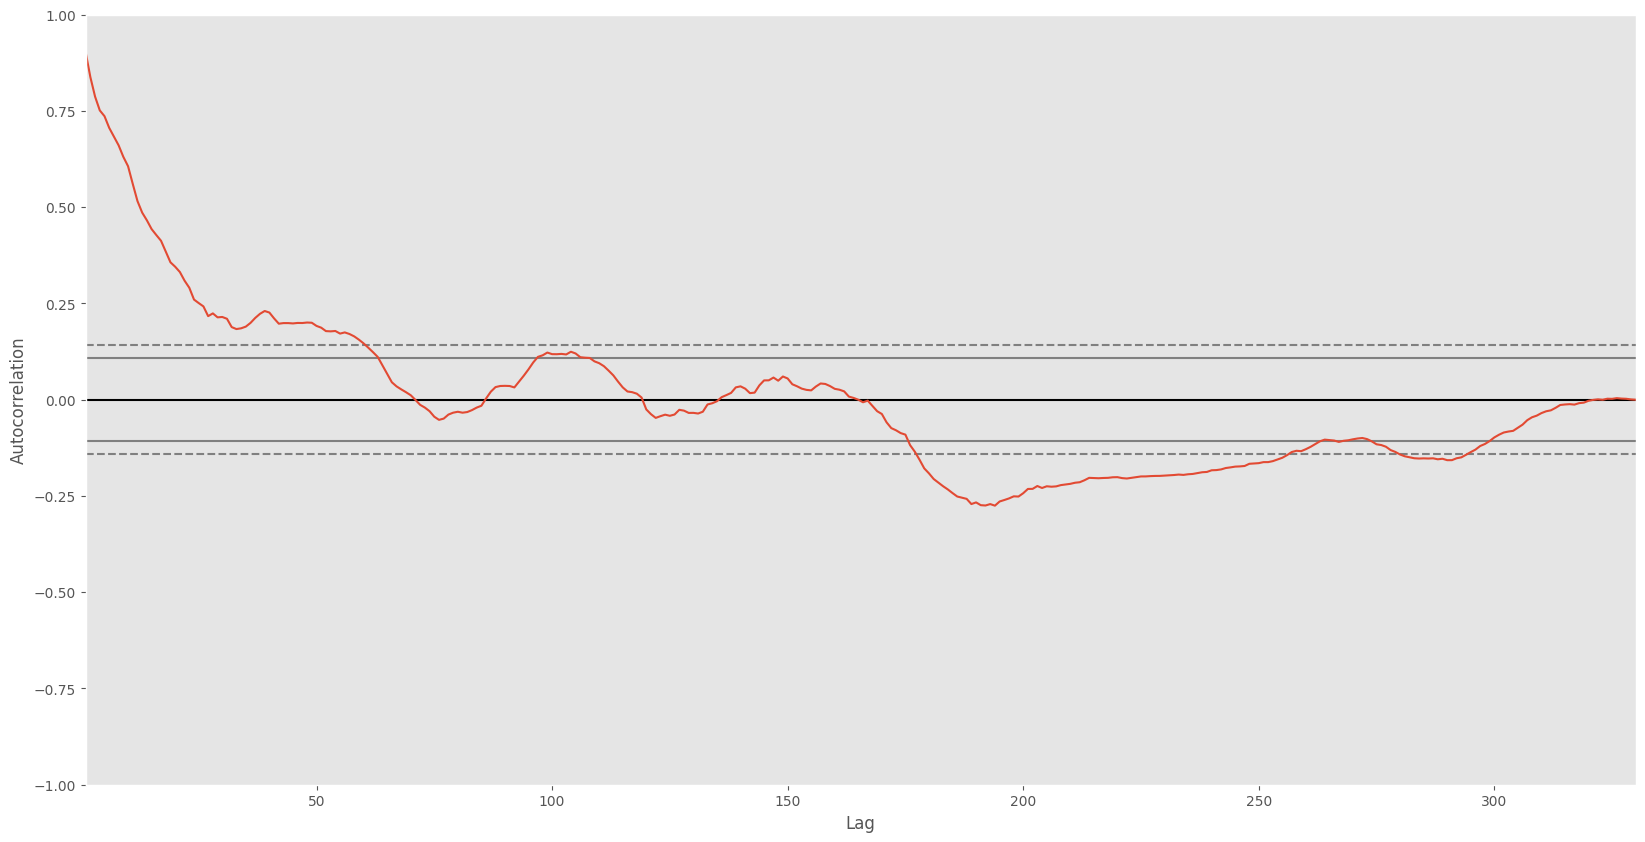

Estatísticas ADF: -2.2818480272195316
Valor-p: 0.17788918996977815


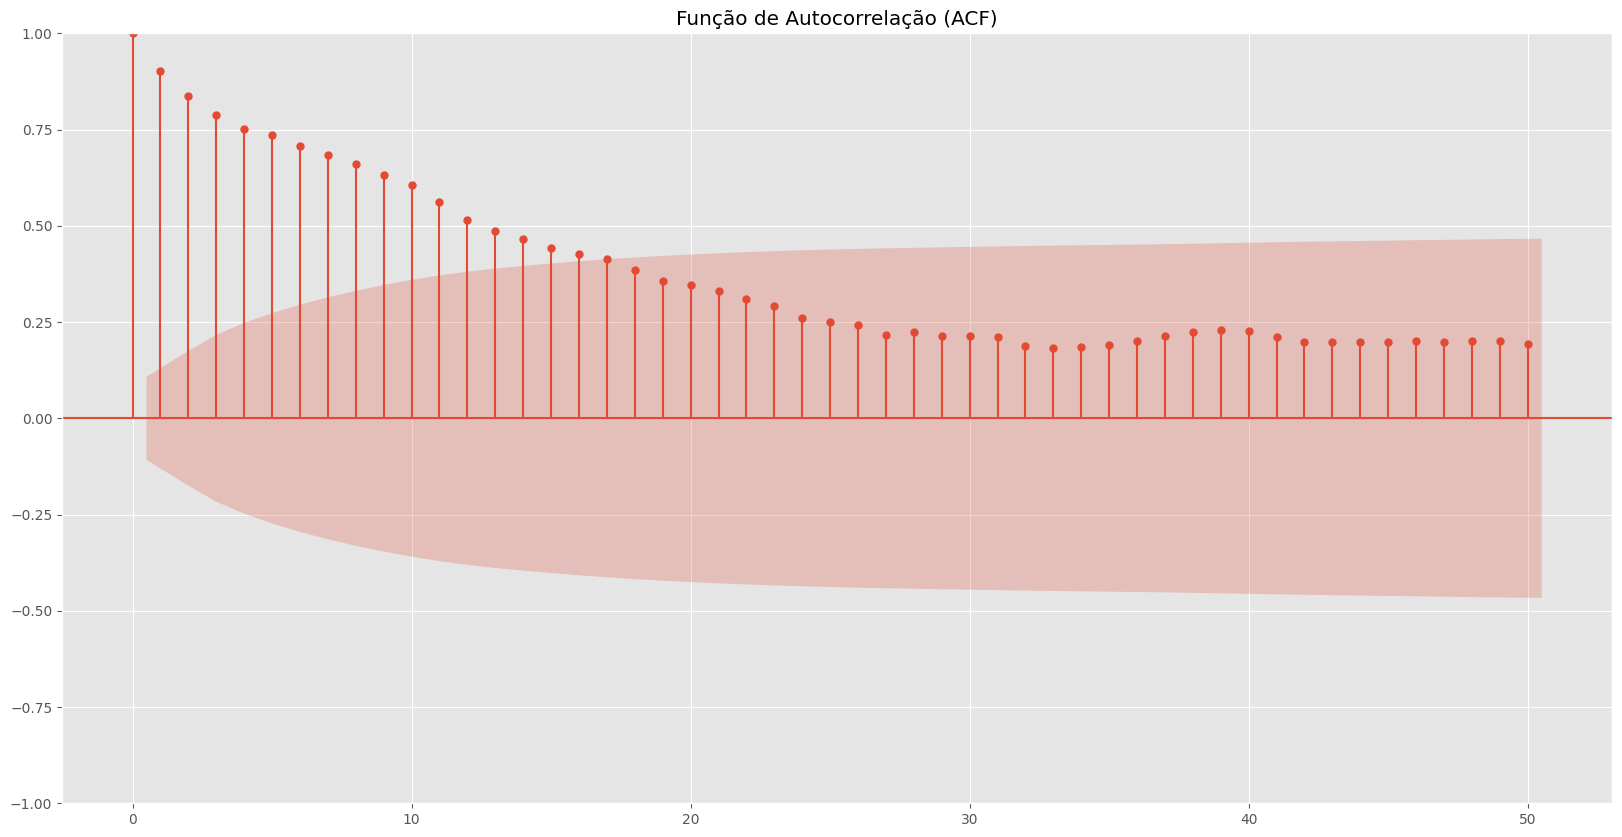

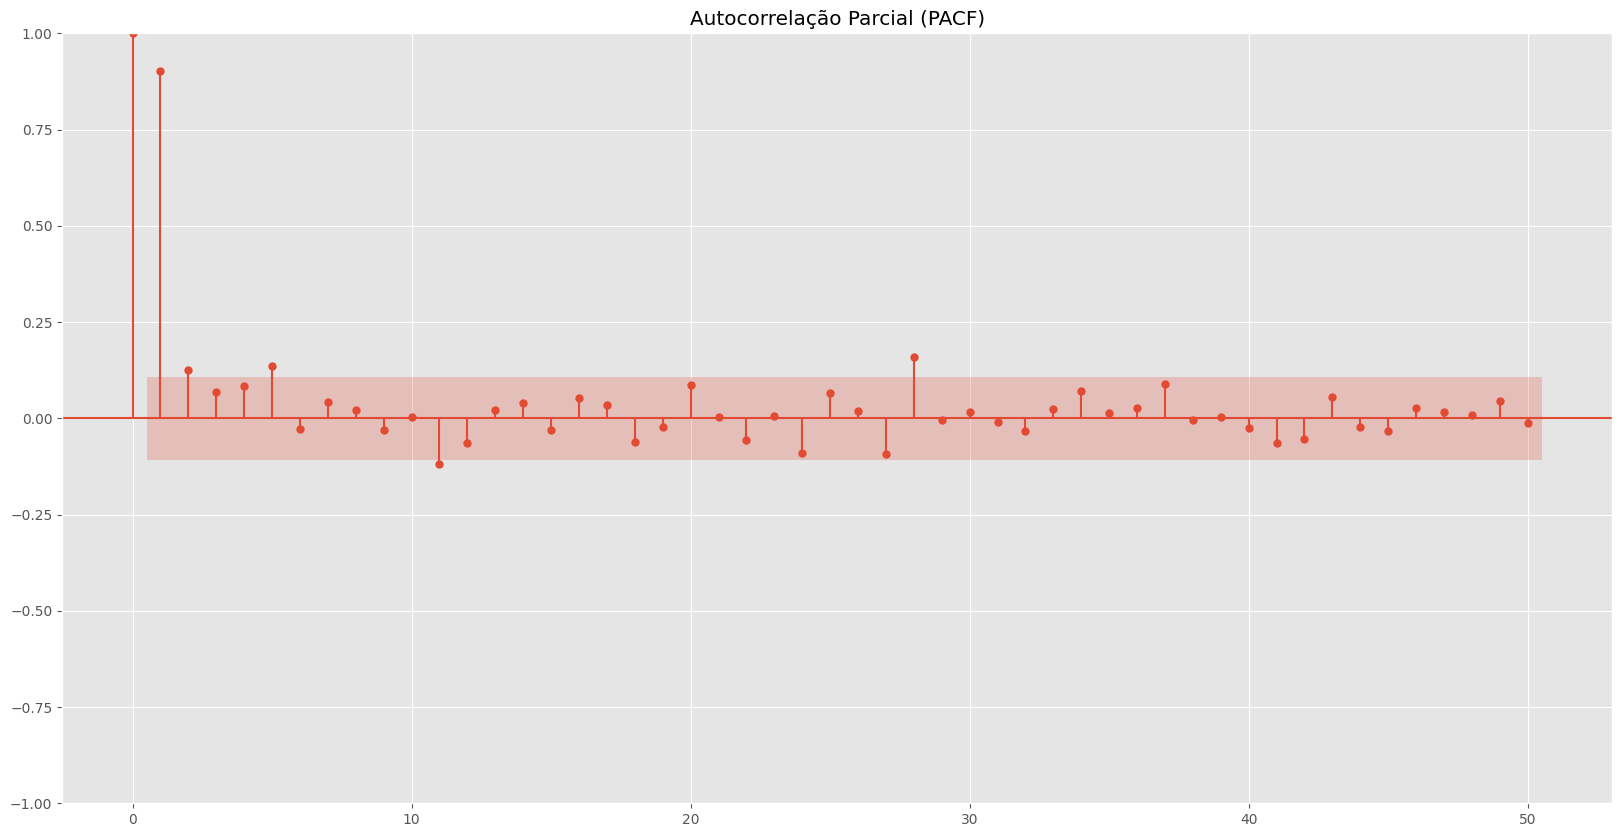

DatetimeIndex(['2023-02-26 11:50:00', '2023-02-26 12:00:00',
               '2023-02-26 12:10:00', '2023-02-26 12:20:00',
               '2023-02-26 12:30:00', '2023-02-26 12:40:00',
               '2023-02-26 12:50:00', '2023-02-26 13:00:00',
               '2023-02-26 13:10:00', '2023-02-26 13:20:00',
               ...
               '2023-02-28 18:00:00', '2023-02-28 18:10:00',
               '2023-02-28 18:20:00', '2023-02-28 18:30:00',
               '2023-02-28 18:40:00', '2023-02-28 18:50:00',
               '2023-02-28 19:00:00', '2023-02-28 19:10:00',
               '2023-02-28 19:20:00', '2023-02-28 19:30:00'],
              dtype='datetime64[ns]', name='Timestamp (end of interval)', length=330, freq=None)
                                SARIMAX Results                                 
Dep. Variable:     40m Wind Speed (m/s)   No. Observations:                  330
Model:                   ARIMA(5, 1, 0)   Log Likelihood                -426.180
Date:                  Mon, 12

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


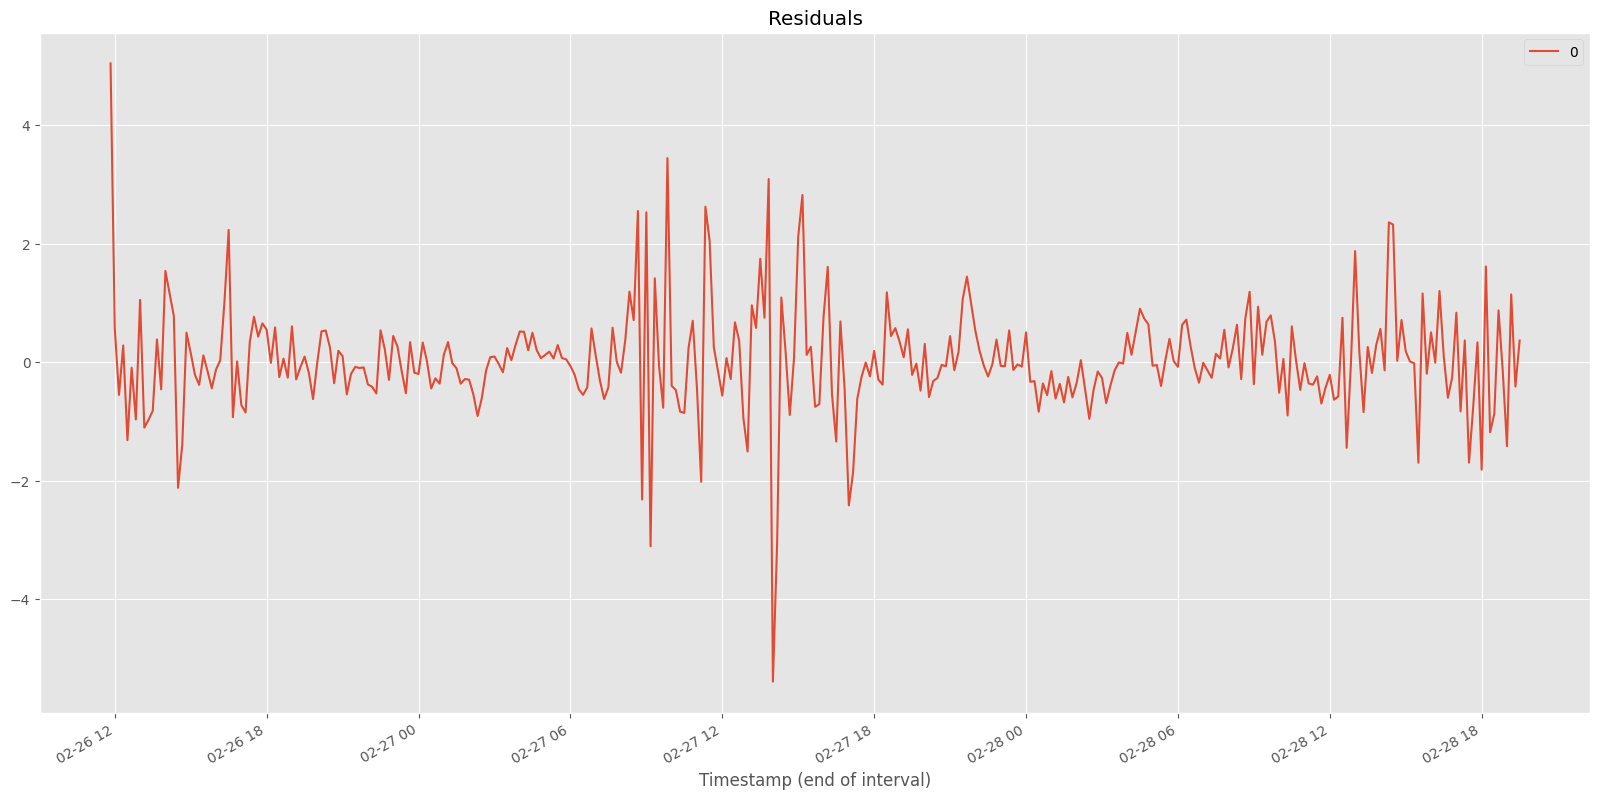

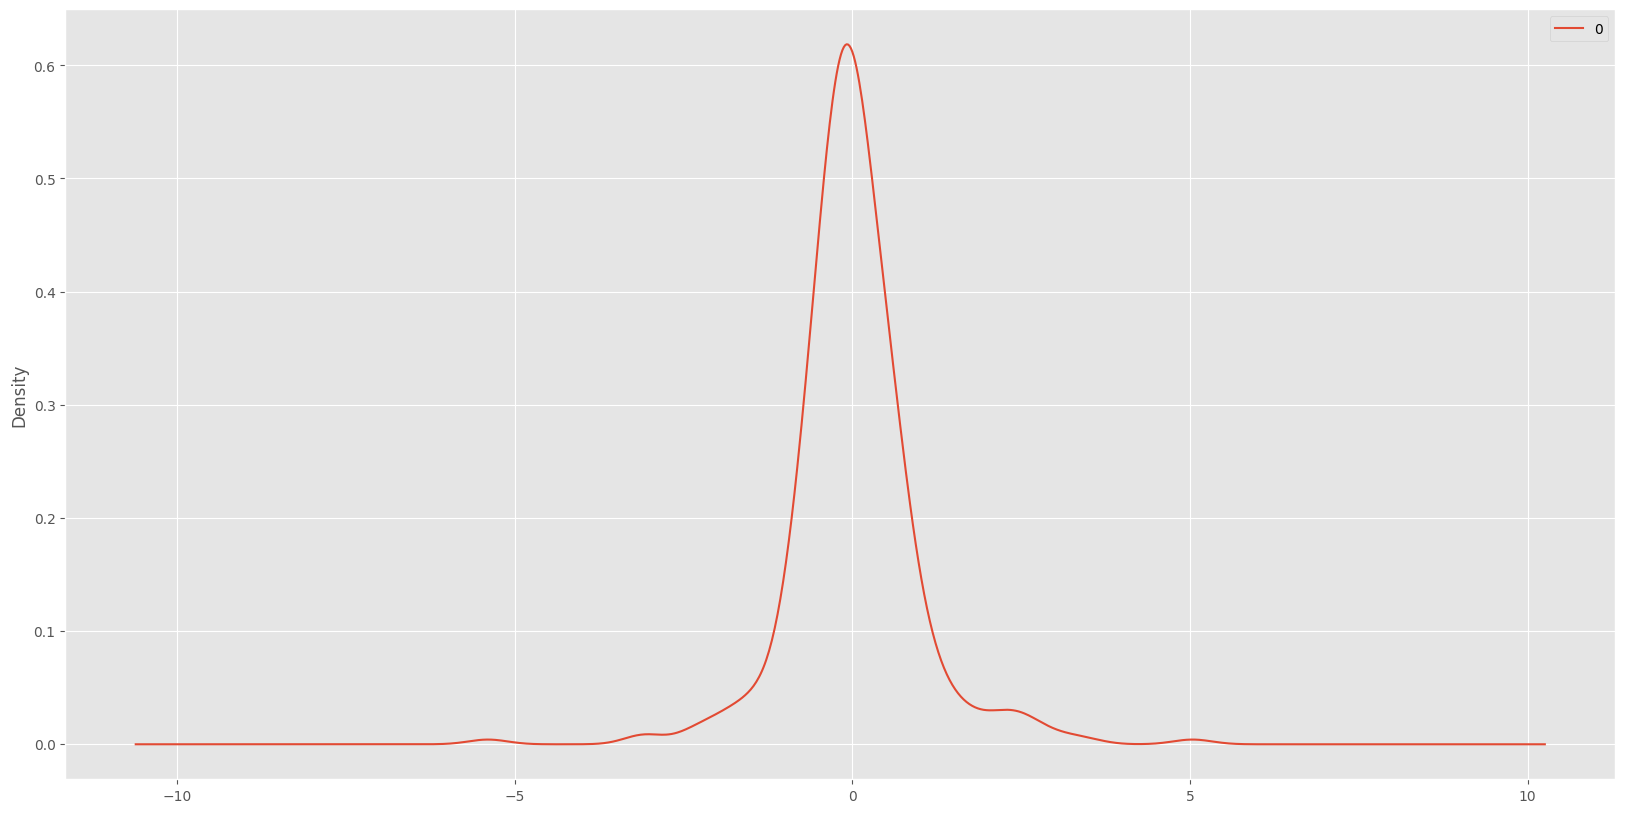

                0
count  330.000000
mean     0.024646
std      0.925991
min     -5.392424
25%     -0.381615
50%     -0.022274
75%      0.389584
max      5.040000
Previsão: 330    7.084820
331    6.860680
332    6.957957
333    6.880623
334    6.917378
335    6.945033
336    6.927060
337    6.935006
338    6.925888
339    6.924633
340    6.928277
341    6.927526
342    6.928851
343    6.928363
344    6.927762
345    6.927923
346    6.927822
347    6.927987
348    6.928042
349    6.927990
350    6.927988
351    6.927962
352    6.927966
353    6.927978
354    6.927979
355    6.927981
356    6.927978
357    6.927976
358    6.927976
359    6.927977
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


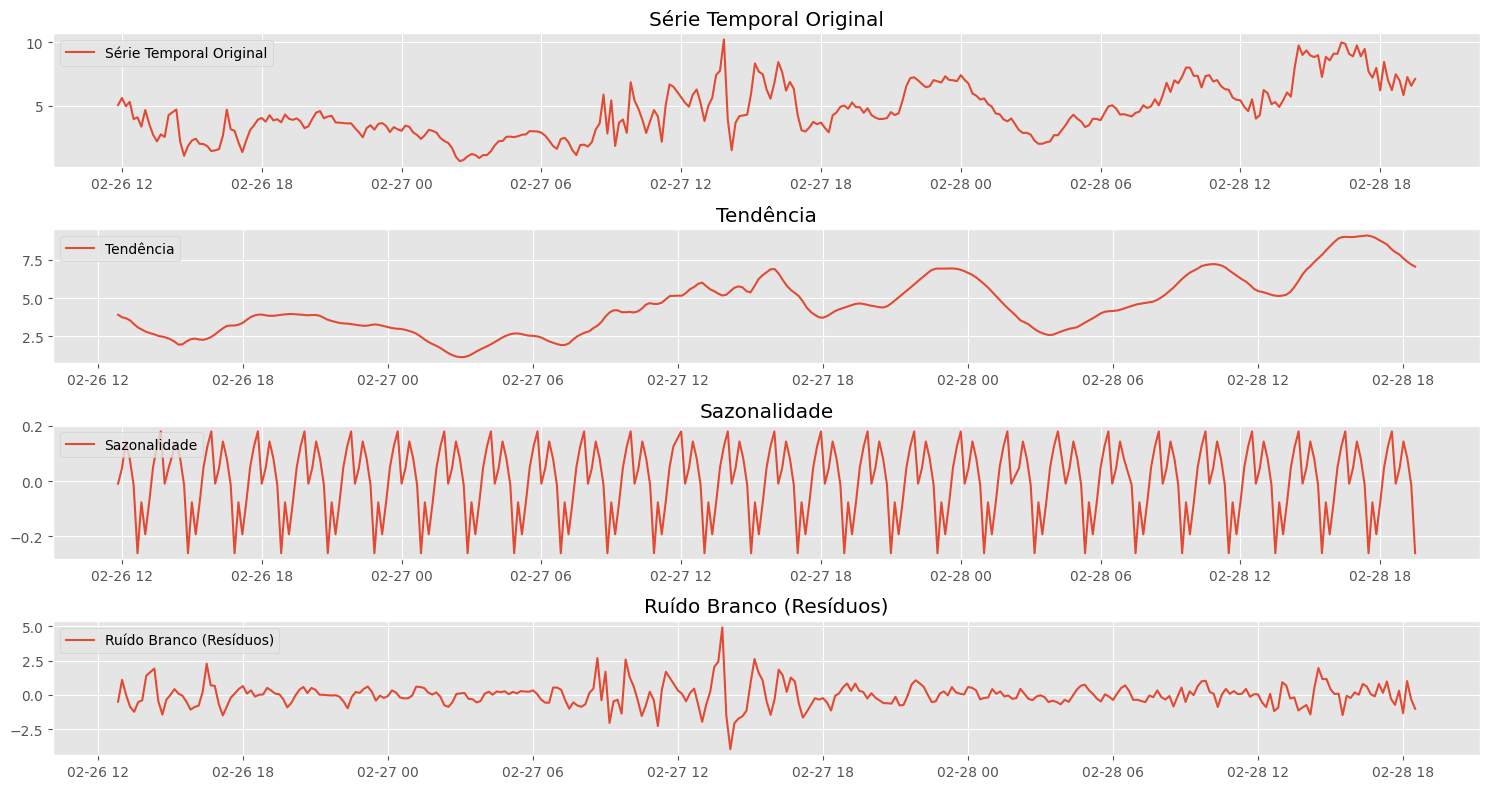

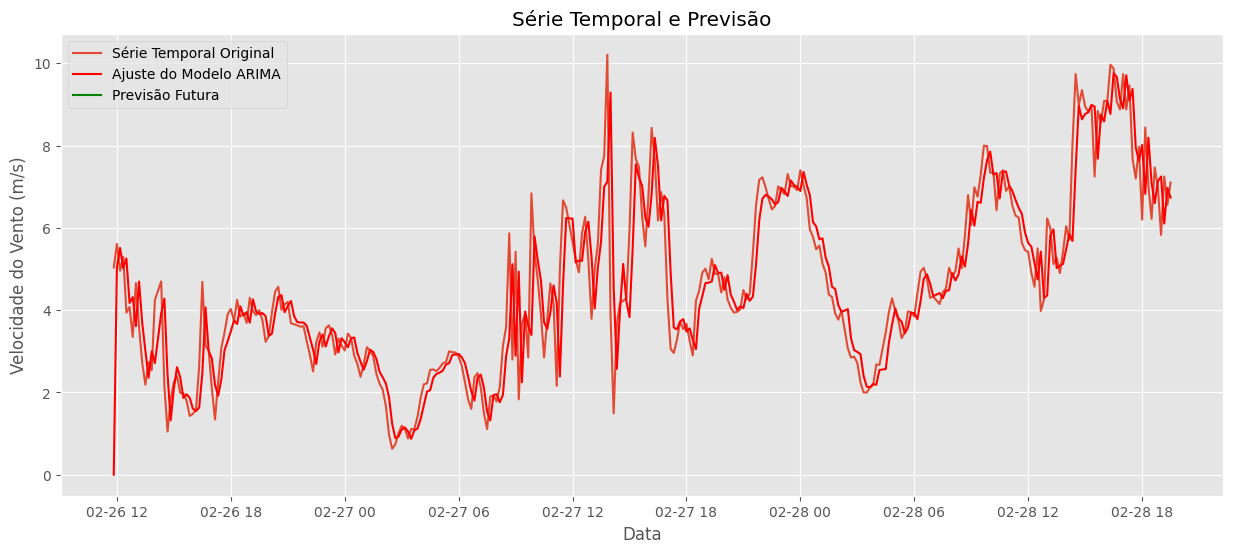

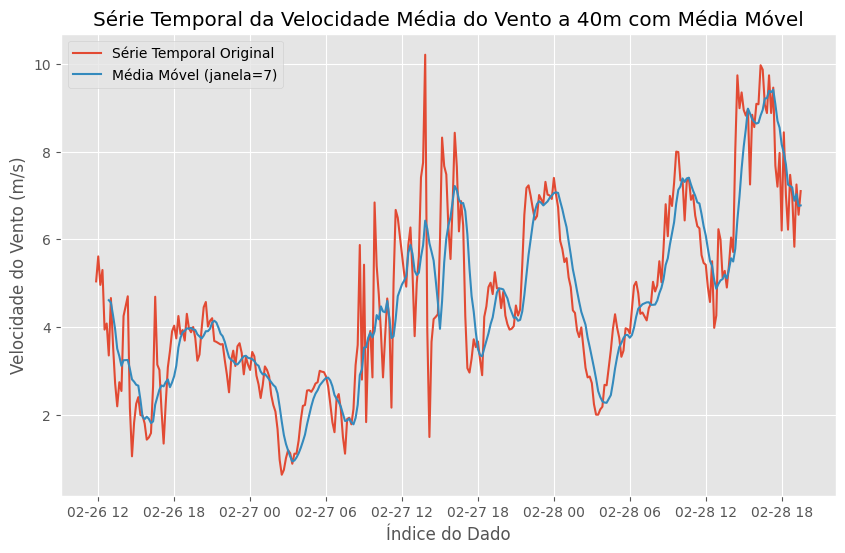

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:     40m Wind Speed (m/s)   No. Observations:                  330
Model:                   ARIMA(1, 1, 2)   Log Likelihood                -427.791
Date:                  Mon, 12 Feb 2024   AIC                            863.583
Time:                          20:41:24   BIC                            878.767
Sample:                               0   HQIC                           869.640
                                  - 330                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5505      0.198      2.780      0.005       0.162       0.939
ma.L1         -0.7722      0.199     -3.874      0.000      -1.163      -0.382
ma.L2         -0.0046      0.074    

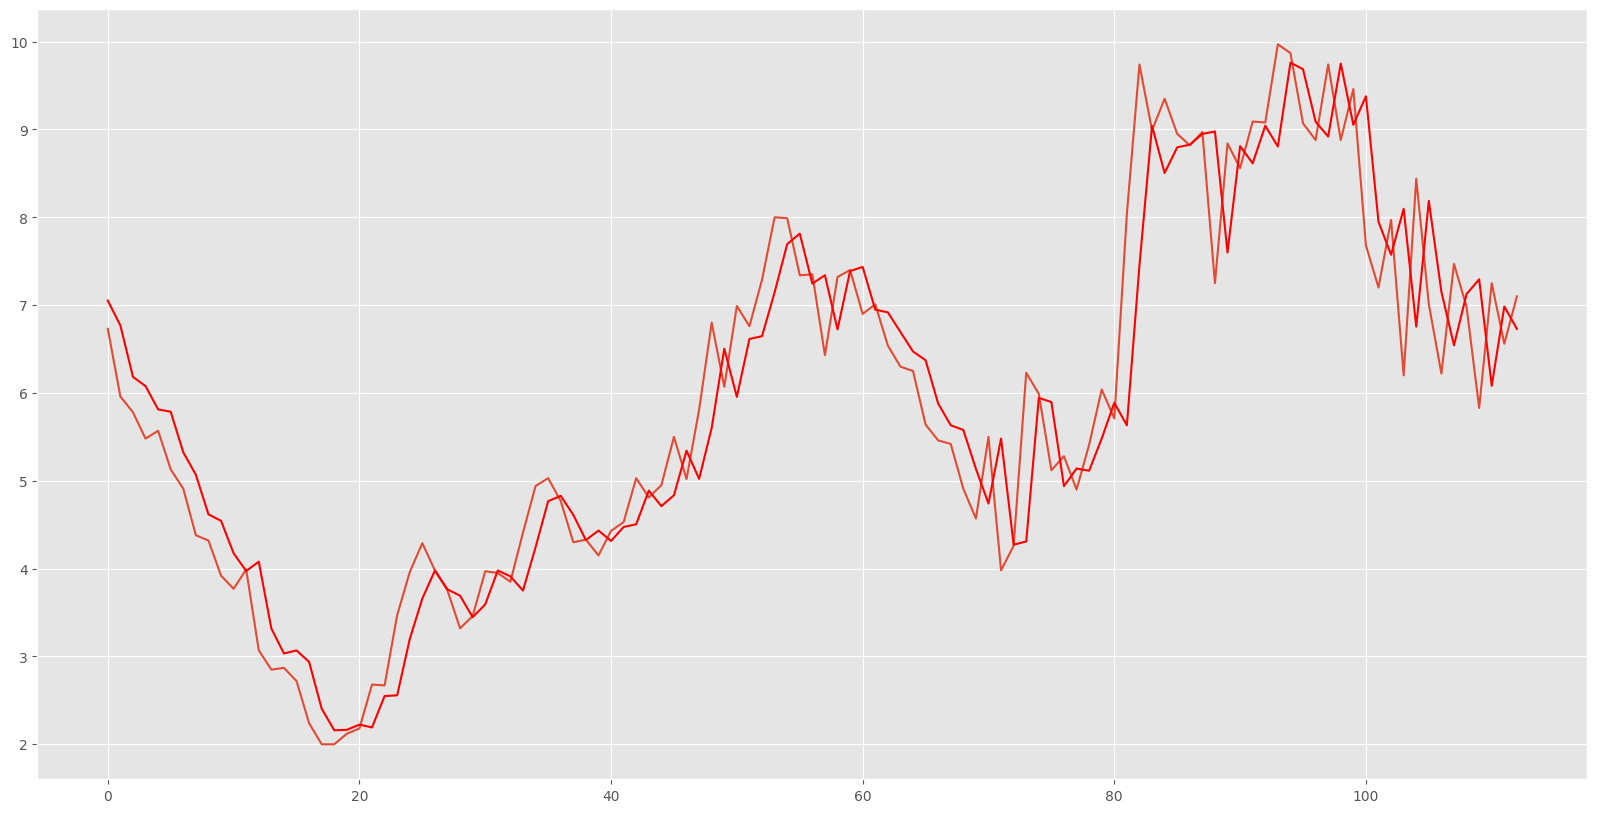

In [41]:
autocorrelation_plot(velocidade_media)
plt.show()


# Verifique a estacionariedade da série temporal
result = adfuller(velocidade_media)
print('Estatísticas ADF:', result[0])
print('Valor-p:', result[1])

# Plote as funções de autocorrelação (ACF) e autocorrelação parcial (PACF)
plot_acf(velocidade_media, lags=50)
plt.title('Função de Autocorrelação (ACF)')
plt.show()

plot_pacf(velocidade_media, lags=50)
plt.title('Autocorrelação Parcial (PACF)')
plt.show()

#velocidade_media.index = velocidade_media.index.to_period('M')
print(velocidade_media.index)

# fit model
model = ARIMA(velocidade_media, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot(title="Residuals")
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

# Previsão
forecast = model_fit.forecast(steps=30)  # Exemplo de 30 passos de previsão
print('Previsão:', forecast)


# Decomposição da série temporal
decomposition = seasonal_decompose(velocidade_media, period=12,model='additive')  # Ajuste o período sazonal conforme necessário
#decomposition = seasonal_decompose(velocidade_media, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Visualização dos componentes
plt.figure(figsize=(15, 8))
plt.subplot(4, 1, 1)
plt.plot(velocidade_media, label='Série Temporal Original')
plt.legend(loc='upper left')
plt.title('Série Temporal Original')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Tendência')
plt.legend(loc='upper left')
plt.title('Tendência')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Sazonalidade')
plt.legend(loc='upper left')
plt.title('Sazonalidade')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Ruído Branco (Resíduos)')
plt.legend(loc='upper left')
plt.title('Ruído Branco (Resíduos)')

plt.tight_layout()
plt.show()

# Série Temporal e visualização das previsões
plt.figure(figsize=(15, 6))
plt.plot(velocidade_media, label='Série Temporal Original')
plt.plot(model_fit.fittedvalues, color='red', label='Ajuste do Modelo ARIMA')
plt.plot(pd.Series(forecast, index=pd.date_range(start=velocidade_media.index[-1], periods=31, freq='M')[1:]),
         color='green', label='Previsão Futura')
plt.legend(loc='upper left')
plt.title('Série Temporal e Previsão')
plt.xlabel('Data')
plt.ylabel('Velocidade do Vento (m/s)')
plt.grid(True)
plt.show()





# Calcula a média móvel com uma janela de 7 dias
media_movel = velocidade_media.rolling(window=7).mean()

# Crie um gráfico da série temporal da velocidade média do vento com a média móvel
plt.figure(figsize=(10, 6))
plt.plot(velocidade_media, label='Série Temporal Original')
plt.plot(media_movel, label='Média Móvel (janela=7)')
plt.title('Série Temporal da Velocidade Média do Vento a 40m com Média Móvel')
plt.xlabel('Índice do Dado')
plt.ylabel('Velocidade do Vento (m/s)')
plt.legend()
plt.grid(True)
plt.show()

# Modelo ARIMA
modelo_arima = ARIMA(velocidade_media, order=(1, 1, 2))  # AR=1, I=1, MA=1
#resultado_arima = modelo_arima.fit()
resultado_arima = modelo_arima.fit()
print(resultado_arima.summary())


# evaluate an ARIMA model using a walk-forward validation

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
velocidade_media.index = velocidade_media.index.to_period('M')
# split into train and test sets
X = velocidade_media.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

nesse algoritmo Integrar algoritmos genéticos com modelos ARMA (AutoRegressive Moving Average) ou ARIMA (AutoRegressive Integrated Moving Average)  para otimizar os parâmetros do modelo e melhorar a precisão das previsões dessa maneira:

- Defina a Função de Aptidão (Fitness Function): A função de aptidão avalia a qualidade de um conjunto específico de parâmetros do modelo ARMA ou ARIMA. Isso pode ser baseado em medidas de erro, como MSE (Mean Squared Error) ou MAE (Mean Absolute Error), calculadas usando validação cruzada ou outro método de validação.

- Parâmetros do Modelo: Represente os parâmetros do modelo ARMA ou ARIMA como cromossomos em uma população. Cada cromossomo representa uma possível combinação de parâmetros.

- Inicialize a População: Gere uma população inicial de cromossomos com parâmetros aleatórios ou usando algum conhecimento prévio sobre os parâmetros.

- Avalie a Aptidão (Fitness) da População: Para cada conjunto de parâmetros na população, aplique o modelo ARMA ou ARIMA aos dados de treinamento e calcule a função de aptidão.

- Selecione os Pais: Selecione os cromossomos com as melhores funções de aptidão para serem os pais da próxima geração. Isso pode ser feito usando métodos de seleção como a roleta ou o torneio.

- Reprodução e Crossover: Use operadores de crossover para combinar os genes dos pais e criar novos cromossomos. Isso pode envolver a troca de partes dos cromossomos entre os pais.

- Mutação: Introduza aleatoriedade na população alterando alguns dos genes (parâmetros) dos cromossomos de forma aleatória.

- Avalie a Nova População: Aplique novamente o modelo ARMA ou ARIMA com os parâmetros atualizados aos dados de treinamento e calcule a função de aptidão para a nova população.

- Critério de Parada: Repita os passos 5 a 8 por um número fixo de gerações ou até que a convergência seja alcançada com base em algum critério de parada, como estagnação da melhoria da função de aptidão.

- Retorne o Melhor Modelo: Após as iterações, retorne o conjunto de parâmetros do modelo que produziu a melhor função de aptidão como a solução otimizada.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from deap import creator, base, tools, algorithms

# Importar os dados
df = pd.read_excel('/content/wind_merged.xlsx', header=0, index_col=0, parse_dates=True, squeeze=True)
velocidade_media = df['40m Wind Speed (m/s)']

# Definir a função de fitness
def evaluate(individual, y_train):
    p, d, q = map(int, individual)
    model = ARIMA(y_train, order=(p, max(0, d), q))
    fit_model = model.fit()
    y_pred = fit_model.predict()
    return mean_squared_error(y_train, y_pred),

# Configuração do algoritmo genético
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register("attr_int", np.random.randint, 0, 5)  # Valores de p, d, q
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)  # Crossover
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)  # Mutação
toolbox.register("select", tools.selTournament, tournsize=3)  # Seleção
toolbox.register("evaluate", evaluate, y_train=velocidade_media)  # Função de fitness

# Parâmetros do algoritmo genético
pop_size = 50
n_gen = 10
cxpb = 0.5
mutpb = 0.2

# Geração da população inicial
population = toolbox.population(n=pop_size)

# Execução do algoritmo genético
algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=n_gen, verbose=True)

# Melhor indivíduo
best_individual = tools.selBest(population, k=1)[0]
print("Melhor conjunto de parâmetros:", best_individual)

# Treinamento do modelo ARIMA com os melhores parâmetros encontrados
p, d, q = map(int, best_individual)
model = ARIMA(velocidade_media, order=(p, max(0, d), q))
fit_model = model.fit()

# Previsões
y_pred = fit_model.predict(start=len(velocidade_media), end=len(velocidade_media) + len(velocidade_media) - 1)

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.plot(velocidade_media, label='Série Temporal Original')
plt.plot(np.arange(len(velocidade_media), len(velocidade_media) + len(velocidade_media)), y_pred, label='Previsão')
plt.legend()
plt.title('Série Temporal e Previsão')
plt.xlabel('Índice do Dado')
plt.ylabel('Velocidade do Vento (m/s)')
plt.grid(True)
plt.show()

